In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# A Toy Simulation of a High-Energy Particle Physics Experiment<a class='tocSkip'></a>
## Using Object Oriented Techniques in Python<a class='tocSkip'></a>
## Version 0.2 - October 2019 (English)<a class='tocSkip'></a>

> Here, we will define a simple simulation of a particle physics experiment.  We model the experiment using _Object Oriented_ (OO) techniques. We will define a hierarchy of types of detectors and how they interact with particles.  The main point of this note is to show how OO techniques are useful for modeling various systems. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

We want to model a particle physics experiment.  That means, we need to be able to describe particles and their properties, and how these particles interact with detectors.  We also want to have some notion of measurements done by the detectors.  To simplify the code, we work in 2 dimensions, and we assume all our experimental components have simple shapes.   Ideally, we would make the toy three dimensional - and one would use some 3D geometry package - but for the sake of simplicity we stick to two dimensions. 

We will define a few sets of classes representing different pieces of our simulation 

- Classes related to particles, such a particle types (`ParticleType`), a database of particle types (`ParticleDB`), a particle (`Particle`), as well as a generator of particles (`Generator`). Note, particle types, and particles are _immutable_ objects - that is, once created, we cannot change them.  
- Classes related to tracking particles.  We define the wrapper class `Track` which represents a single particle being tracked through the simulation.  `Track` objects are _mutable_ since we will continuously update the track parameters (position, momentum).   We also formulate the notation of _tracking media_ (`Medium`).  This represents the condition under which we propagate a track - e.g., a magnetic field.  Here, we will define two concrete tracking media `Air` which does nothing to the tracks, and `MagneticField` which deflects are charged-particle track.  Note, to determine points of intersection, we define four, relatively complex, functions to calculate possible time-to-interaction, point of interaction, and possible change in direction at the interaction.  These functions are used by the tracking media to effectively do calculations. 
- Shapes of components.  We define the abstract notion of a shape (`Shape`), which allows us to define track propagation by querying concrete shapes for intersection points.   We will define a number of simple shapes here, such as `Polygon`, `Rectangle`, `Arc`, `Ring` and similar.  More complex shapes can easily be defined using the existing shapes as templates. 
- Coordinate transformations.  When placing the experiment components in the set-up, we want to use coordinate transformations (`Transformation`).  We define simple translation in `Translation` and rotation in `Rotation`. The class `Combined` represents a combined translation followed by a rotation, and is implemented via _multiple inheritance_ from the two preceding classes.   Transformations provides means of translating from the global coordinate system and back again. 
- Component volumes.  Each component in the set-up will be represented by a volume.  A volume (`Volume`) is a shape with a tracking medium, translated somewhere in the setup.  Volumes also provides the possibility of defining `Measurement`s by deriving from the `Volume` base class and overloading the `interact` member function.  We will use that in later experimental setups. 
- Steering of the simulation.  The simulation is steered by the class `Steer`.  Each time a particle is propagated through the setup, we will get the history of interactions as a `History` object.  If any volume defined measurements, then objects of class `Measurement` is attached to this history.   Thus, from our history objects we can analyse the simulated events. 

## Components of the model

- `ParticleType` and `ParticleDB`: which kind of particle (pion, kaon, proton, ...)
- `Particle` and `Generator`: Particle information (four-vectors) and generator of collisions
- `Track`: a `Particle` propagated through the experiment 
- `Medium`: a region of space which somehow interacts with `Particle`s (`Air`, `MagneticField`)
- `Shape`: a shape of some experimental apparatus 
- `Transformation`: a transformation of a `Shape` 
- `Volume`: a `Shape`, `Medium`, and `Transformation` tied together to a concrete apparatus 
  - Also allows for `Measurement`s to simulate detector response 
- `Steer`: the master of the whole simulation 

In the end, we will end up with _class diagram_ as shown below  


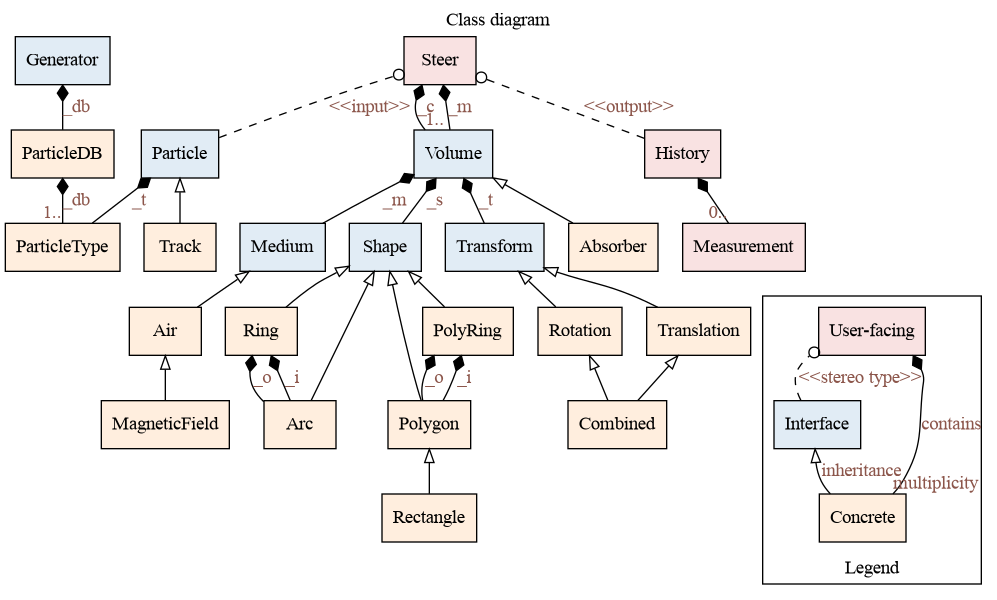


This diagram shows the relationship between the various classes.  

First off, the classes that have a blue background are _base_ classes that defines an interface, but may actually not _implement_ that interface.   Classes with orange background _do_ implement the interfaces to which they point (this is called _inheritance_).  The classes with red background are the main user interface classes - i.e., the classes which a user of a simulation will see and interact with.   

_Arrows_ indicate _inheritance_.  That is, a concrete implementation of an interface (or _base class_) points to that interface.  Objects of some classes may hold objects of other classes - this is indicated by the diamond connector.   This connector is possibly decorated by a _multiplicity_ if there are more than one such object contained.  Finally, the open-circle, dashed connector indicated usage of other class objects.  These connectors are decorated by a _stereo type_ - e.g., the `Steer` class takes `Particle` objects as input and produces `History` objects as output. 

Note how _interfaces_ are closer to the user-facing classes, while concrete _implementations_ are further out.  This is the core of _Object Oriented Programming_ (OOP) - the user interacts with the _interface_ and leaves the concrete behaviour to the _implementations_.  For example, the class `Steer` knows about the concept of a `Volume` but not the concrete implementations.  Similarly the class `Volume` knows about the concepts of a `Shape` and `Medium` but not the concrete ways these are implemented.   We can think of _interfaces_ as defining a _contract_ between the user and the concrete implementations of that interface.  The user will manipulate the objects according to the interface, and the implementation encodes the correct behaviour for the particular implementation of that interface. 

Through out the notebook we will implement tests of classes defined, so that we are sure that each class works as expected before moving on to other classes.   Note, no _doc-strings_ are defined - mainly to conserve space in this notebook - but the classes are described before they are implemented. 

# Particles and Particle types 

## Particle types 

We will model particle types by the parameters 

- name
- mass 
- electric charge 

We do not need to model such things as hadron versus lepton, nor properties such as iso-spin, since these are not part of model of the experiment.  

In [2]:
class ParticleType:
    def __init__(self,code,name,mass,charge):
        self._i = code     # PDG code
        self._n = name     # Name of type
        self._m = mass     # Mass of type 
        self._q = charge   # Electric charge of type
        
    @property 
    def i(self): return self._i
    
    @property 
    def name(self): return self._n
    
    @property
    def m(self): return self._m
    
    @property 
    def q(self): return self._q 
    
    def __str__(self): return self._n

## Database of particle types 

We want to make a database of particles types, and we want to be able to extract a random particle type from that. Note, we weigh the probability of a given particle type by the inverse of the mass

$$p_t = \frac{1}{m_t}\quad,$$

such that lighter particles are more probable and thus abundant than heavier particles.  

In [3]:
class ParticleDB:
    def __init__(self):
        self._types = []  # List of particle types 
        self._prob  = []  # Associated probability 
        self._map   = {}
        
        p    = ParticleType(2212,  r'$\mathrm{p}$',0.9382720813,+1)
        pbar = ParticleType(-p.i,  r'$\overline{\mathrm{p}}$',p.m,-p.q) 
        pip  = ParticleType(211,   r'$\pi^+$',0.1395701,+1)
        pim  = ParticleType(-pip.i,r'$\pi^-$',pip.m, -pip.q)
        kp   = ParticleType(321,   r'$\mathrm{K}^+$',0.493677,+1)
        km   = ParticleType(-kp.i, r'$\mathrm{K}^-$',kp.m, -kp.q)
        self.add(p)
        self.add(pbar)
        self.add(pip)
        self.add(pim)
        self.add(kp)
        self.add(km)
    
    def add(self,p,prob=None):
        self._types.append(p)
        if prob is None:
            prob = 1/p.m
        self._prob.append(prob)
        self._map[p.i] = p
        
    def __getitem__(self,pdg):
        if pdg not in self._map:
            return None
        return self._map[pdg]
        
    def random(self,size=1):
        from numpy import asarray
        from numpy.random import choice
        
        return choice(self._types,p=asarray(self._prob)/sum(self._prob),size=size)

Let us test this, by selecting 1000 random particles and then count how many times we have each kind.  We expect lighter particles $\pi^+,\pi^-$ to be more abundant than the heavier particles ($\overline{\mathrm{p}},\mathrm{p}$)

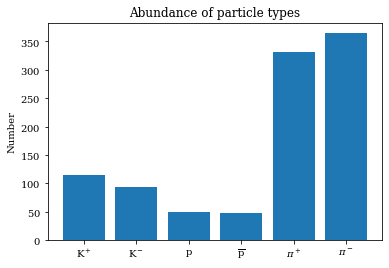

In [4]:
def testDB():
    from matplotlib.pyplot import bar, ylabel, title, show, figure
    db = ParticleDB()
    l = {}
    for p in db.random(1000):
        if not (p.name) in l: 
            l[p.name] = 0
        l[p.name] += 1    
        
    figure()
    s = sorted(l)
    bar(s,[l[ss] for ss in s])
    ylabel('Number')
    title('Abundance of particle types');
    return show()
    
testDB()

## A particle 

Next, we need to model a specific particle.  We want to model 

- Particle type via the class `ParticleType` 
- Starting position 
- Starting momentum 

We will also define a number of utility properties (read-only properties), such as 

- $p_z$
- $p_{\mathrm{T}}$
- $p = \sqrt{p_{\mathrm{T}}^2+p_z^2}$
- $E = \sqrt{m^2+p^2}$
- $y = \frac{1}{2}\log\frac{E+p_z}{E-p_z}$
- $\theta = \tan^{-1}\frac{p_{\mathrm{T}}}{p_z}$
- $\eta = -\log\tan\frac{\theta}{2}$

Remember, we work in only two dimensions, so our positions and momenta need only be 2-dimensional. 

In [5]:
class Particle:
    def __init__(self,tpe,origin,momentum):
        from numpy import asarray
        self._t = tpe                   # type of particle
        self._v = asarray(origin)    # Point of origin
        self._p = asarray(momentum)  # Starting momentum

    @property 
    def type(self): return self._t
    
    @property 
    def v(self): return self._v
    
    @property
    def p(self): return self._p 
    
    @property
    def pp(self): 
        from numpy import sqrt
        return sqrt((self._p**2).sum())
    
    @property 
    def pt(self): return self._p[0]
    
    @property 
    def pz(self): return self._p[1]
    
    @property 
    def e(self):
        from numpy import sqrt
        return sqrt(self._t.m**2 + self.pt**2 + self.pz**2)
    
    @property
    def y(self): 
        from numpy import log
        e = self.e
        return 0.5*log((e + self.pz)/(e - self.pz))
    
    @property
    def theta(self):
        from numpy import arctan2
        return arctan2(self.pt,self.pz)
    
    @property 
    def eta(self):
        from numpy import log, tan
        return -log(tan(self.theta/2))
    
    def __str__(self):
        return self.type.name

## Particle generator 

We also need some generator of particles.  First, we define a _generic_ generator.  That is, we define a class which has the interface for a generator, but we will not actually _implement_ it here. 

In [6]:
class Generator:
    def __init__(self, db=None):
        self._db = db
        pass 
    
    def generate(self,size=1):
        raise NotImplementedError('Generic generator function called')

Let us make a concrete implementation.  In this implementation, we will, for each particle generated do 

- pick a random particle type
- pick a random transverse momentum $p_{\mathrm{T}}$ drawn from an exponential function with parameter $p_0$ 
- pick a random rapidity 

  $$ y = \frac{1}{2}\log\left(\frac{E+p_z}{E-p_z}\right)\quad,$$ 
  
  drawn from an normal distribution with mean $\mu=0$ and width $\sigma$ 
- set the point of origin to $(0,0)$ 
- calculate the horizontal momentum $p_z$ as 

$$p_z = \sinh(y)\sqrt{m^2 + p_{\mathrm{T}}^2}\quad,$$ 

where $m$ is the mass of the particle.  Note, at the time we pick the rapidity we do not know $p_z$.  That does not matter as we draw the $y$ value from a random distribution, and we use the relation above and the random pick of the transverse momentum $p_{\mathrm{T}}$ to calculate $p_z$. 

In [7]:
class ExpNormal(Generator):
    def __init__(self, p0=0.5, sigma=2, db=None):
        super(ExpNormal,self).__init__(db)
        self._p0    = p0
        self._sigma = sigma
        if self._db is None:
            self._db = ParticleDB()
        
    def generate(self,size=1):
        from numpy import array, sqrt, sinh 
        from numpy.random import normal, exponential
        types = self._db.random(size=size)
        pts   = exponential(self._p0,size=size)
        ys    = normal(0,self._sigma,size=size)
        ms    = array([p.m for p in types])
        pzs   = sqrt(ms**2 + pts**2)*sinh(ys)
        
        return [Particle(t,(0,0),(pt,pz)) for t,pt,pz in zip(types,pts,pzs)]

Let us generate some particles and plot various distributions 

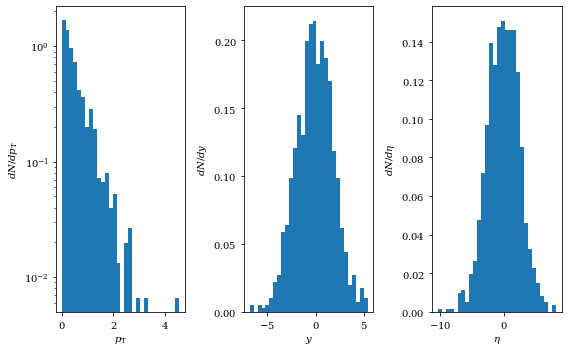

In [8]:
def testExpNormal():
    from numpy import array
    from matplotlib.pyplot import subplots, tight_layout, show
    
    g = ExpNormal()
    data = array([(p.pt, p.y, p.eta) for p in g.generate(1000)])
    fig, ax = subplots(ncols=3,figsize=(8,5))
    ax[0].hist(data[:,0],30,density=True)
    ax[1].hist(data[:,1],30,density=True)
    ax[2].hist(data[:,2],30,density=True)
    ax[0].set_yscale('log')
    ax[0].set_xlabel(r'$p_{\mathrm{T}}$')
    ax[0].set_ylabel(r'$dN/dp_{\mathrm{T}}$')
    ax[1].set_xlabel(r'$y$')
    ax[1].set_ylabel(r'$dN/dy$')
    ax[2].set_xlabel(r'$\eta$')
    ax[2].set_ylabel(r'$dN/d\eta$')
    tight_layout()
    show()
    
testExpNormal()

# Tracking particles

## A track 

As we propagate particles through our simulated experimental set-up, we will continuously update the position and possibly momentum of the particles.  Thus, we would like to have a representation of a particle at any given point in time, which gives 

- the current position 
- the current momentum 
- the current time 

To that end, we make a special sub-class of `Particle` which encodes these, as well as point back to the original particle.  Objects of the `Particle` class are _immutable_ - that is, we cannot change them.  However, while propagating the particle through the experimental set-up, we need to update the position, momentum, and time of particles.  Thus, `Track` objects are _mutable_ (changeable) wrappers around the original `Particle` object. 

In [9]:
class Track(Particle):
    def __init__(self,orig,v,p,t):
        super().__init__(orig.type,v,p)
        self._o = orig
        self._s = t
        
    @property
    def t(self): return self._s
    
    @property
    def o(self): return self._o
    
    def update(self,v,p,t):
        self._v = v
        self._p = p 
        self._s = t 
        
    def __str__(self):
        return '{:23s} t={:12.8g} v=({:7.4f},{:7.4f}) p=({:7.4f},{:7.4f})'.\
            format(self.o.type.name,self.t,self.v[0],self.v[1],self.p[0],self.p[1])

## Track propagation 

You may want to skip this section upon reading this document and then later return to get the full
details.  If you decide to do so, know that we define the following functions to find the time to 
$t$ and point of $\vec{c}$ intersect 

- `rayAndPolygon` for ray and polygon 
- `rayAndArc` for ray and arc 
- `arcAndPolygon` for circular trajectory and polygon 
- `arcAndArc` for circular trajectory and arc 

and trust that we test these appropriately. Then, once you've read the rest, you can come back here and get the full picture.  Skip to [the next section](#Tracking-mediums). 

We need to propagate tracks through our experimental set-up.  That is, for a given track at some position $\vec{v}$ and some momentum $\vec{p}$, we need to find the next component in the experimental set-up that the particle will impinge on.  

If the particle is not experiencing any kind of external field (say a magnetic field), then the particle will travel in a straight line from $\vec{v}=\begin{bmatrix}v_x\\v_y\end{bmatrix}$ in the direction $\vec{p}\begin{bmatrix}p_x\\p_y\end{bmatrix}$ until it meets a component.   

### Ray intersect with a polygon 

If a component is given by a polygon shape, we need to find the intersect of the ray from $\vec{v}$ in the direction $\vec{p}$ with any of the possible sides of the polygon.  That is, we want to see if it traverses the side of a component given by the line segment $\vec{a}=\begin{bmatrix}a_x\\a_y\end{bmatrix}$ to $\vec{b}=\begin{bmatrix}b_x\\b_y\end{bmatrix}$.   

If we write the parameterised lines 

\begin{align*}
  R &: \vec{v} + t\vec{p}\\
  L &: \vec{a} + s(\vec{b}-\vec{a})
\end{align*}

we want to find $s,t$ such that 

$$\vec{v} + t\vec{p} = \vec{a} + s(\vec{b}-\vec{a})\quad.$$ 

Thus, with $\vec{d}=\vec{b}-\vec{a}$ we have the linear system 

$$
\begin{bmatrix} v_x - a_x \\ v_y - b_x\end{bmatrix} 
= \begin{bmatrix} d_x & p_x \\ d_y & p_y\end{bmatrix}\begin{bmatrix} s\\-t\end{bmatrix}\quad,$$ 

which has a solution if the determinant 

$$D = \mathrm{det}\begin{bmatrix} d_x & p_x \\ d_y & p_y\end{bmatrix} = d_x p_y - d_y p_x\quad,$$ 

is non-zero.  If $D=0$, then the lines $p$ and $l$ are parallel and do not intersect.   Otherwise, we have the solution 

\begin{align*}
 s &= \frac{(v_x - a_x)p_y - (v_y - a_y)p_x}{D}\\
 t &= \frac{(v_x - a_x)d_y - (v_y - a_y)d_x}{D}\quad.
\end{align*}

If $0 \leq s \leq 1$, then the point of intersect is on the line segment $\vec{a}$ to $\vec{b}$ and is given by 

$$\vec{i} = \vec{a}+s\vec{b} = \vec{v}+t\vec{p}\quad.$$ 

If $s< 0$ or $s>1$, then the line passes the line segment.  

Otherwise, $t$ is the "time to intersect from the origin along the vector $\vec{p}$.   For a true intersect, we require that $t>0$ - otherwise the particle would have to travel back in time to reach the line segment. 

We encode this into a single function accepting the rays starting point $\vec{v}$, and direction $\vec{p}$, and the line segment $\vec{a},\vec{b}$.  The function returns the time and point of intersect, or `None` if no intersection was found. 

In [10]:
def rayAndSegment(v,p,a,b):
    from numpy import asarray, isclose
    b   = asarray(b)
    a   = asarray(a)
    d   = b - a
    det = d[0]*p[1] - d[1]*p[0]

    if isclose(det,0):
        return None

    l = v - a
    s = (l[0]*p[1] - l[1]*p[0])/det

    if s < 0 or s > 1:
        return None
    
    t = (l[0]*d[1] - l[1]*d[0])/det
    if isclose(t,0) or t < 0:
        return None

    return t, v + t * p

Let us test this simple function.  Since we will be drawing line segments over and over in thie notebook, we define a function to do that for us. 

In [11]:
def plotSegment(*args,**kwargs):
    from matplotlib.pyplot import gca
    
    if len(args) < 2: 
        raise ValueError('No points given for line segment')
    a, b = args[:2]
    ax = kwargs.pop('ax',gca())
    return ax.plot([a[0],b[0]],[a[1],b[1]],*args[2:],**kwargs)

Likewise, we will make a function to draw rays, since, again, we will do that several times over below

In [12]:
def plotRay(*args,**kwargs):
    from numpy import asarray 
    
    if len(args) < 2: 
        raise ValueError('No starting point or direction given for ray')
    a = asarray(args[0]) 
    b = a + asarray(args[1])
    return plotSegment(a,b,*args[2:],**kwargs)

We will also plot intersection points quite often, and a function seems handy in that case. 

In [13]:
def plotIntersect(t,*args,**kwargs):
    from numpy import array
    from matplotlib.pyplot import gca 

    if t is None: return
    ax = kwargs.pop('ax',gca())
    pf = kwargs.pop('dp',0)
    lb = kwargs.pop('label','')
    lb = ' '.join([lb, r'$t={:.4g}'.format(t[0])])
    kwargs['label'] = lb
    ax.plot(*t[1],*args,**kwargs)
    
    if pf > 0 and len(t) > 2:
        dp = array([t[1],t[1]+pf*t[2]])
        ax.plot(dp[:,0],dp[:,1],'--',**kwargs)
        
    return t

We will also generate momenta several times below, so we define a function that will return an array of momenta of some length in the range between two angles or two points 

In [14]:
def momenta(p,n,theta1=None,theta2=None,a=None,b=None,v=None,sa=1,sb=1):
    from numpy import array, cos, sin, arctan2, linspace
    
    vs = None if v is None else [arctan2(y,x) for x,y in v]
    if theta1 is None:
        if a is not None:
            theta1 = arctan2(a[1],a[0])
        if vs is not None:
            theta1 = min(vs)
            
    if theta2 is None:
        if b is not None:
            theta2 = arctan2(b[1],b[0])
        if vs is not None:
            theta2 = max(vs)
    
    if theta1 is None or theta2 is None:
        raise ValueError('No angles, end-points, or verices given')
        
    if theta2 < theta1:
        theta1, theta2 = theta2, theta1 
        
    return p*array([(cos(ang),sin(ang)) for ang in linspace(sa*theta1,sb*theta2,n)])

We are now well-prepared to perform our test with as much clarity as possible

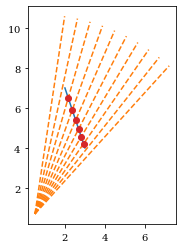

In [15]:
def testRaySegment():
    from matplotlib.pyplot import figure, gca
    
    a = (3,4)
    b = (2,7)
    
    figure()
    plotSegment(a,b,label='Line segment')
    ps  = momenta(10,10,a=a,b=b,sa=.9,sb=1.1)
    v   = (.5,.7)
    for p in ps:
        plotRay(v,p,'--',color='tab:orange')
        plotIntersect(rayAndSegment(v,p,a,b), 'o', color='tab:red')
    gca().set_aspect(1)
    
testRaySegment()

To find the point of intersection of a ray with a polygon, we simple need to loop over all sides of the polygon and find the intersection (if any) which has the smallest (non-negative) time-to-intersect. 

In general, we will often have two or more solutions to the intersection problem, so we define a function that will pick the _earliest_ of a number of solutions.  This function expects a number of tuples of the format 

- the time of intersect 
- the rest 

The function will return `None` if all arguments passed are `None`

In [16]:
def earliest(*args):
    s = sorted([i for i in args if i is not None])
    return None if len(s) < 1 else s[0]

Note, we will return to this function over and over again, so we better perform a check on this 

In [17]:
def testEarliest():
    assert earliest((3,'a'),(2,'b'),(4,'c')) is (2,'b')
    assert earliest((3,'a'),None,(4,'c')) is (3,'a')
    assert earliest(None,None,None) is None
    assert earliest(None) is None 

testEarliest()

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_455300/2632580255.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  assert earliest((3,'a'),(2,'b'),(4,'c')) is (2,'b')
/tmp/ipykernel_455300/2632580255.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  assert earliest((3,'a'),None,(4,'c')) is (3,'a')


We can use this to loop over all the sides of the polygon and returned the earliest intersection (if any)

In [18]:
def rayAndPolygon(v,p,vert):
    return earliest(*[rayAndSegment(v,p,a,b) for a,b in zip(vert[1:],vert[:-1])])

Again, we want to test this.  As we will draw polygons over and over again, we make a small function to help us do that first

In [19]:
def plotPolygon(verts,*args,**kwargs):
    from matplotlib.pyplot import gca
    from numpy import asarray 
    
    ax = kwargs.pop('ax',gca())
    vs = asarray(verts)
    return ax.plot(vs[:,0],vs[:,1],*args,**kwargs)

We then do our test 

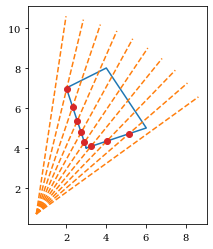

In [20]:
def testRayPolygon():
    from matplotlib.pyplot import figure, gca
    
    verts = [(3,4),(2,7),(4,8),(6,5),(3,4)]
    
    plotPolygon(verts,label='Polygon')
    ps  = momenta(10,10,v=verts,sa=.9,sb=1.1)
    v   = (.5,.7)
    for p in ps:
        plotRay(v,p,'--',color='tab:orange')
        plotIntersect(rayAndPolygon(v,p,verts),'o',color='tab:red')

    gca().set_aspect(1)
    
testRayPolygon()

### Ray intersect with an arc 

If the component is represented by an arc (e.g., a circle), then the point of intersect is given by considering the following.   We write the parameterised line 

$$R: \vec{v}+t\vec{p}\quad,$$ 

and the circle as 

$$C: |\vec{x}-\vec{c}|^2<r^2\quad,$$ 

where $\vec{c}$ is the centre of the circle and $r$ the radius.  Defining $\vec{l}=\vec{v}-\vec{c}$, and substituting in, we find the quadratic equation 

$$|\vec{p}|^2 t^2 + 2\vec{p}\cdot\vec{l}t +|\vec{l}|^2-r^2 = 0\quad,$$ 

with well known solutions 

$$t = \frac{-\vec{p}\cdot\vec{l}\pm\sqrt{D}}{|\vec{p}|^2}\qquad D=|\vec{p}\cdot\vec{l}|^2 - |\vec{p}|^2(|\vec{l}|^2-r^2)\quad,$$

where $D$ is the determinant.  If $D<0$, then there are no real solutions, and the ray does not intersect the circle $C$.  If $D=0$ there is exactly one solution, meaning the ray $R$ is tangent to $C$.  For our purposes, we will ignore this solution.   Thus, the only solutions we are interested in are when $D>0$ and $t\geq 0$.  We then find the solution such that the time-to-intersect $t$ is smallest.  

If the component we are looking is a segment of a circle given by starting and ending angles $\vartheta_1$ and $\vartheta_2$, respectively, then we must also check that the found point of intersect $\vec{i}$ is indeed on the arc from 

\begin{align*}
\vec{a} &= \vec{c} + r\begin{bmatrix}\cos\vartheta_1\\\sin\vartheta_1\end{bmatrix}\\
\vec{b} &= \vec{c} + r\begin{bmatrix}\cos\vartheta_2\\\sin\vartheta_2\end{bmatrix}\quad,\\
\end{align*} 

which is true if 

$$(\vec{i}-\vec{a})\cdot(\vec{b}-\vec{a})_{\perp}\geq 0\quad.$$

However, here we will calculate the angle $\varphi$ from the centre of revolution $\vec{c}$ to intersection point $\vec{i}$ as 

$$\varphi = \tan^{-1}\frac{i_y - c_y}{i_x - c_x}\quad,$$ 

and check that $\vartheta_1 < \varphi < \vartheta_2$. 

Note that the function `arctan2` returns values in the range $[-\pi,\pi]$ so we must normalise the returned angle to the interval $[0,2\pi]$ by adding $2\pi$ to negative $\varphi$ values.  Also note that we may pass a negative value for $r$ (as will be apparent later), which has no baring on the solutions found above. 

We code this up in a single function which accepts the point of origin $\vec{v}$ and direction $\vec{p}$ of the ray, and the circle centre $\vec{c}$ and radius $r$.  We also accept the angles $\vartheta_1$ and $\vartheta_2$, but default their values so that $\vartheta_2<\vartheta_1$.  We also define the keyword `maxt` to set an upper limit on accepted $t$ values.  For a line segment 

$$L: \vec{v}+t\vec{p}\quad t\in[0,1]\quad,$$ 

we can set this to 1 to limit the points of intersection to the segment.  

We split the implementation of finding the intersection point of a ray with an arc into two.  First, a function that checks if a point of intersect is valid.  Given 

- the ray from $\vec{v}$ in the direction $\vec{p}$ 
- the time of intersect $t$ 
- optionally, the centre of the arc $\vec{c}$ and ending angles $a,b$ 
- and, optionally, a maximum time $t_{\mathrm{max}}$ 

we check 

- that $t>0$ (if not, the particle will be travling backward in time),  
- if $t_{\mathrm{max}}>0$, that $t<t_{\mathrm{max}}$, and
- if $a<b$, calculate the angle $\varphi$ between the point of intersect $\vec{i}$ and $\vec{c}$, and that $a<\varphi<b$.

If any of these conditions are _not_ met, then we return no (`None`) no solution.  Otherwise, we return the time of intersect $t$ and the intersection point 

$$\vec{i} = \vec{v}+t\vec{p}\quad.$$

In [21]:
def rayPointOnArc(v,p,t,c,a,b,maxt):
    from numpy import arctan2,pi,isclose
    
    if t < 0 or isclose(t,0): return None 
    if maxt > 0 and t > maxt: return None 
    
    i = v + t * p
    if a < b:
        ic = i - c
        tt  = arctan2(ic[1],ic[0])
        if tt < 0: tt += 2*pi
        if tt < a or tt > b: 
            return None
    return t,i

Next, we implement the solution to the problem as stated above.  That is, we calculate the determinant and find any possible roots to the quadratic equation.  Then, we use the function `rayPointOnArc` to check if the solutions are valid and finally we compare the time-ordered solutions using the function `earliest` 

In [22]:
def rayAndArc(v,p,c,r,theta1=0,theta2=-1,maxt=-1):
    from numpy import asarray,dot,sin,cos,sqrt,isclose,array
    
    c   = asarray(c)
    l   = v - c
    l2  = l[0]**2 + l[1]**2
    p2  = p[0]**2 + p[1]**2
    pl  = dot(p,l)
    det = pl**2 - p2 * (l2 - r**2)
    
    if det < 0 or isclose(det,0): return None 
    
    s1 = (-pl + sqrt(det)) / p2
    s2 = (-pl - sqrt(det)) / p2
    i1 = rayPointOnArc(v,p,s1,c,theta1,theta2,maxt)
    i2 = rayPointOnArc(v,p,s2,c,theta1,theta2,maxt)
    return earliest(i1,i2)

We must of course implement a test.  Again, we will draw arcs several times so we define a function to do that for us. 

In [23]:
def plotArc(c,r,theta1=-1,theta2=-1,*args,**kwargs):
    from numpy import sin,cos,asarray,array,linspace,pi,deg2rad
    from matplotlib.pyplot import gca 
    
    ax  = kwargs.pop('ax',gca())
    deg = kwargs.pop('degrees',False)
    
    if theta1 < 0:  theta1 = 0
    elif deg:       theta1 = deg2rad(theta1)
        
    if theta2 < 0:  theta2 = 2*pi
    elif deg:       theta2 = deg2rad(theta2)
        
    a = array([(c[0]+r*cos(ang),c[1]+r*sin(ang)) 
              for ang in linspace(theta1,theta2,100)])
    
    return ax.plot(a[:,0],a[:,1],*args,**kwargs)

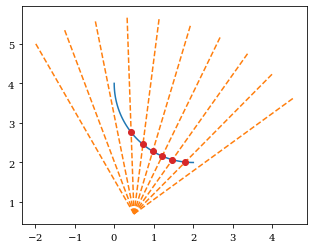

In [24]:
def testRayArc():
    from numpy import pi
    from matplotlib.pyplot import figure, gca
    
    figure()
    c      = (2,4)
    r      = 2
    theta1 = pi
    theta2 = 3*pi/2
    plotArc(c,r,theta1,theta2,label='Arc')
    ps     = momenta(5,10,pi/5,2*pi/3)
    v   = (.5,.7)    
    for p in ps:
        plotRay(v,p,'--',color='tab:orange')
        plotIntersect(rayAndArc(v,p,c,r,theta1,theta2),'o',color='tab:red')
    
    gca().set_aspect(1)

testRayArc()

### Arc intersectiing with a polygon 

Suppose the particle starting at $\vec{v}$ with momentum $\vec{p}$ is influenced by some external field (say, a magnetic field).  Then the particle may follow a circular path.   Thus, we need to find the point of intersection with a polygon where $\vec{v}$ is the starting point along a circular (arc) path.  Let us assume we know the radius $r$ of the circular path.   The centre of revolution is then given by 

$$\vec{c} = \vec{v} + r\frac{\vec{p}_{\perp}}{|\vec{p}|} = \vec{v}+r\frac{1}{|\vec{p}|}\begin{bmatrix}-p_y\\p_x\end{bmatrix}\quad,$$

and we can utilise the function `rayAndArc` defined above to get the earliest point of intersection, passing `maxt=1` to ensure the point found is on the line segment $\vec{a},\vec{b}$. 

Note, however, that the time returned by that function is the time along the line segment 

$$L: \vec{a}+t(\vec{b}-\vec{a})\quad t\in[0,1]\quad,$$ 

which is not what we are after.  Instead, we are after the time passed along the circular path from point $\vec{v}$ to the point of intersection $\vec{i}$.  Thus, we calculate the angle between the starting point $\vec{c}$ and the intersection point $\vec{i}$ with respect to the centre of the circular motion, given by 

$$\cos\vartheta = \frac{(\vec{v}-\vec{c})\cdot(\vec{i}-\vec{c})}{|\vec{v}-\vec{c}||\vec{i}-\vec{c}|}\quad,$$

and return $\vartheta$ instead.  

We may have that $r<0$ (as is the case for a negatively charged particle in a positive magnetic field).  The equation for the centre of revolution $\vec{c}$ above is still valid, as is the solutions found by `rayAndArc`.  However, a negative $r$ really means that the circular trajectory is _clockwise_ rather than _counter-clockwise_.  This, on the other hand, means that the angle $\vartheta$ is _negative_ for a valid solution that is on the circular trajectory.  Thus, we multiply $\vartheta$ by the _sign_ of $r$ to get a positive _time_, so we have that the returned angle is given by 

$$\vartheta = 
\left[\tan^{-1}\left(\frac{i_y-c_y}{i_x-c_x}\right) 
- \tan^{-1}\left(\frac{v_y-c_y}{v_x-c_y}\right)\right]
\times\begin{cases} \phantom{-}1 & \text{for}\ r>0\\ -1& \text{for}\ r<0\end{cases}\quad,$$

and we require that $\vartheta>0$. 

Note, since we require that $|\vec{p}|>0$ and $\vec{c}$ is _not_ on the arc, the two vectors $\vec{v}-\vec{c}$ and $\vec{i}-\vec{c}$ are never zero. 

In [25]:
def arcAngle(v,c,i):
    from numpy import arccos, dot, abs, nan, arctan2
    from numpy.linalg import norm 
    
    ic  = i - c
    vc  = v - c
    av  = arctan2(vc[1],vc[0])
    ai  = arctan2(ic[1],ic[0])
    return ai-av
    # aa  = dot(vc,ic)/norm(vc)/norm(ic)
    # return arccos(aa) if abs(aa)<1 else nan

In [26]:
def arcAndSegment(v,p,r,a,b,c=None):
    from numpy import asarray, array, sqrt, isclose, sign
    
    a  = asarray(a)
    b  = asarray(b)
    p2 = p[0]**2 + p[1]**2 
    if isclose(p2,0): return None 
    
    if c is None:
        c = r * array((-p[1],p[0]))/sqrt(p2) + v 
    t = rayAndArc(a,b-a,c,r,maxt=1)
    
    if t is None: return None 
    
    i   = t[1]
    ang = sign(r)*arcAngle(v,c,i)
    if ang < 0 or isclose(ang,0):
        return None
    
    return ang, i

Again, we test the function.  We will make a function to draw the curved tracks first, though

In [27]:
def plotDirArc(v,p,sign,r,delta,c=None,*args,**kwargs):
    from numpy import array, sqrt, pi, arctan2
    c = kwargs.pop('cc',sign * r * array([-p[1],p[0]])/sqrt(p[0]**2+p[1]**2)+v)
    th1  = arctan2(v[1]-c[1],v[0]-c[0])
    
    if th1 < 0:  th1 += 2*pi 
    th2  = th1 + sign * delta
    
    l = plotArc(c,r,th1,th2,*args,**kwargs)
    return c, l

Notice that we return the centre of revolution from the above function so that we can pass that on to `arcAndSegment`.  Now, let us test that function.  Note, we can pass in the sign of the curvature to test for both negative and positive charged particles. 

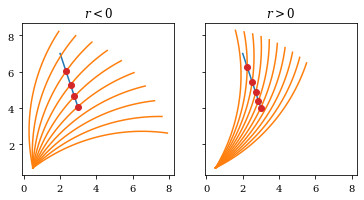

In [28]:
def testArcSegment(sign=1,ax=None):
    from numpy import arctan2, array, pi, sqrt
    from matplotlib.pyplot import gca, figure
    
    a = array((3,4))
    b = array((2,7))
    r = 10
    
    if ax is None:
        figure()
        ax = gca()
    plotSegment(a,b,ax=ax)
    
    ang1, ang2 = arctan2(a[1],a[0]), arctan2(b[1],b[0])
    if sign < 0:
        ang1,ang2 = ang2,ang1
        ang2 += ang1 
    ps = momenta(5,10,ang1,ang2,sa=.5,sb=.8)
    v   = array((.5,.7))
    for p in ps:
        c, _ = plotDirArc(v,p,sign,r,pi/4,'--',ax=ax,color='tab:orange')
        plotIntersect(arcAndSegment(v,p,sign*r,a,b,c),'o',ax=ax,color='tab:red')

    ax.set_title(r'$r {} 0$'.format('<' if sign < 0 else '>'))
    ax.set_aspect(1)

def testArcSeg():
    from matplotlib.pyplot import subplots
    
    fig, ax = subplots(ncols=2,sharex=True,sharey=True)
    testArcSegment(-1,ax[0])
    testArcSegment( 1,ax[1])

testArcSeg()

As before, we can define a function that will find the earliest intersection with a circular path and a polygon.  And, as before, we test each side of the polygon and find the earliest intersection. 

In [29]:
def arcAndPolygon(v,p,r,vert,c=None):
    return earliest(*[arcAndSegment(v,p,r,a,b,c) for a,b in zip(vert[1:],vert[:-1])])

A test seems appropriate 

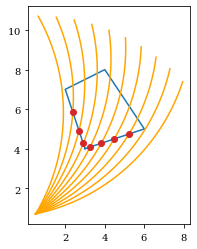

In [30]:
def testArcPolygon(sign=1):
    from numpy import array, arctan2, linspace, cos, sin, sqrt, pi 
    from matplotlib.pyplot import plot, gca, show, figure
    
    figure()
    verts = [(3,4),(2,7),(4,8),(6,5),(3,4)]
    plotPolygon(verts)
    
    r    = 10
    ps   = momenta(r,10,v=verts,sa=.3,sb=.8)
    v    = (.5,.7)
    for p in ps:
        c, _ = plotDirArc(v,p,sign,r,pi/3,'--',color='orange')
        plotIntersect(arcAndPolygon(v,p,r,verts,c),'o',color='tab:red')
    gca().set_aspect(1)
    show()
    
testArcPolygon()

### Arc intersecting and arc

Above, we defined the function `rayAndArc` to find the intersection of a particle starting at $\vec{v}$ traveling along a straight line in the direction $\vec{p}$ with a segment of a circle.  If the particle is influenced by some external field (say a magnetic field), then the trajectory of the particle may be circular.  Thus, we should consider the case where our particle is traveling in along a circular motion and the possible intersection with a an arc.  

Consider the particle starting at $\vec{v}$ with momentum $\vec{p}$ and a radius of revolution $r$ (possibly negative).  We can thus calculate the centre of revolution as above 

$$\vec{c} = \vec{v} + r\frac{\vec{p}_{\perp}}{|\vec{p}|}\quad,$$ 

and define the circle 

$$T: |\vec{x}-\vec{c}|^2=r^2\quad.$$ 

Consider the circle 

$$C: |\vec{x}-\vec{o}|^2=q^2\quad,$$

describing the component we are looking at.  Let us define 

$$\vec{u} = \vec{c}-\vec{o}\quad\vec{v}=\vec{u}_{\perp}\quad.$$

The points of intersection can then be written 

$$\vec{x} = \vec{c} + s\vec{u}+t\vec{v} = \vec{o}+(s-1)\vec{u}+t\vec{v}\quad.$$

Substituting the first and second equal sign into the equations for the circles gives 

$$ (s^2+t^2)|\vec{u}|^2 = r^2\qquad ((s-1)^2+t^2)|\vec{u}|^2 = q^2\quad.$$

Solving for $s$ we find 

$$s = \frac12\left(\frac{r^2-q^2}{|\vec{u}|^2}+1\right)\quad,$$ 

and similarly for $t$ 

$$t^2 = \frac{q^2}{|\vec{u}|^2}-s^2 = - \frac{\left(|\vec{u}|^2-(r+q)^2\right)\left(|\vec{u}|^2-(r-q)^2\right)}{4|\vec{u}|^2}\quad,$$ 

which only has real solutions if the right-hand-side is positive.  Thus we find the requirement that 

$$||r|-q|\leq |\vec{u}|\leq ||r|+q|\quad\text{and}\quad\frac{q^2}{|\vec{u}|^2}-s^2\geq0\quad,$$

for there to be any real solutions.  Note, since $r$ may be negative, we explicitly take the absolute value $|r|$ of $r$. If $|\vec{u}|=||r|+q|$ or $|\vec{u}|=||r|-q|$ then the two circles are tangent at a single point, and for our purposes we will ignore these solutions.  The points of intersect is then found by plugging the found values of $s$ and $t$ into the equation for the first circle, taking care to give both solutions for $t$ 

$$i = \vec{c} + s\vec{u}\pm t\vec{v}\quad.$$ 

To find the earliest intersection, we evaluate the angle between the starting point $\vec{v}$ and the points of intersection $\vec{i}$ with respect to the centre point of revolution $\vec{c}$, given by 

$$\cos\vartheta = \frac{(\vec{v}-\vec{c})\cdot(\vec{i}-\vec{c})}{|\vec{v}-\vec{c}||\vec{i}-\vec{c}|}\quad,$$

as we did above.  However, the same considerations for $r<0$ outlined above applies in this case, and we can therefore use the function `arcAngle` directly, taking care to get the right sign on the angles found.  Since we generally have two solutions, we find the least non-negative angle and intersection point which is consistent with the passed end-points $\vartheta_1,\vartheta_2$ specified (if any). 

In [31]:
def arcPointOnArc(t,i,c,theta1,theta2):
    from numpy import arctan2,pi,isclose
    
    if t < 0 or isclose(t,0): return None 
    
    if theta1 < theta2:
        ic = i - c
        tt = arctan2(ic[1],ic[0])
        if tt < 0: tt += 2*pi 
        if tt < theta1 or tt > theta2:
            return None 
 
    return t, i

In [32]:
def arcAndArc(v,p,r,o,q,theta1=0,theta2=0,c=None):
    from numpy import abs, array, sqrt, isclose, sign

    p2 = p[0]**2 + p[1]**2 
    if isclose(p2,0):
        return None 
    
    if c is None:
        c  = r * array((-p[1],p[0]))/sqrt(p2) + v 
    
    u  = o-c
    u2 = u[0]**2 + u[1]**2 
    if isclose(u2,0): return None 
    
    ar  = abs(r)
    rmq = (ar-q)**2
    rpq = (ar+q)**2
    if isclose(u2,rmq) or isclose(u2,rpq): return None 
    
    s  = ((r**2-q**2)/u2 + 1) / 2
    t2 = r**2 / u2 - s**2 
    if t2 < 0: 
        return None 
    
    t  = sqrt(t2)
    w  = array([-u[1],u[0]])
    
    i1 = c + s*u+t*w 
    i2 = c + s*u-t*w 
    a1 = sign(r)*arcAngle(v,c,i1)
    a2 = sign(r)*arcAngle(v,c,i2)
    c1 = arcPointOnArc(a1,i1,o,theta1,theta2)
    c2 = arcPointOnArc(a2,i2,o,theta1,theta2)
    
    return earliest(c1,c2)

We will, of course implement a test of this

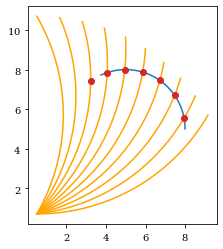

In [33]:
def testArcArc(sign=1):
    from numpy import array,pi 
    from matplotlib.pyplot import gca, figure 
    
    v  = array([.5,.7])
    r  = 10
    ps = momenta(5,10,0,pi/3)
    o   = array([5,5])
    q   = 3
    a1  = 0
    a2  = 3 * pi / 4
    
    figure()
    plotArc(o,q,a1,2)
    
    for p in ps:
        c, _ = plotDirArc(v,p,sign,r,pi/3,'--',color='orange')
        plotIntersect(arcAndArc(v,p,sign*r,o,q,a1,a2,c),'o',color='tab:red')
    gca().set_aspect(1)

testArcArc(1)

## Tracking mediums
In general, we need to propagate a particle from a given point to the next point of interaction with some experimental component.  We thus form the general notion of a `tracking medium`.  That is, at some point, we must know how to propagate the particle in some _medium_.  The medium could be the air surrounding the experimental components, or it could in some magnetic field causing the particle to be deflected. 

We will define a base class for tracking media.  The main function of the class is to find the next point of intersection between a particle and a component.  Thus, the class will define the member function `intersect` which accepts 

- a particle track (current position $\vec{v}$, mometum $\vec{p}$, and time $t$)
- a components parameters

The function will return the `None` if there is no intersection. Otherwise it will return the time to intersection, the point of intersection, and a new direction vector as applicable. 

In [34]:
class Medium:
    def __init__(self):
        pass
    
    def intersect(self,track,vertices=None,center=None,radius=None,theta1=0,theta2=-1):
        raise NotImplementedError('Generic intersect method called')



### 'Air' medium 

This medium represents the _nothing_ medium.  That is, within this medium particles will travel along straight lines given by their momentum vector and starting point.  Thus, our functions `rayToPolygon` or `rayToArc` should be used, depending on the shape of the component we are investigating.  We detect which method to use by checking which arguments where given 

- If the argument `vertices` was given, we use the function `rayAndPolygon`
- If the arguments `center` and `radius` (and optionally `theta1` and `theta2` were given, then we call   
  `rayAndArc` with those arguments. 

Note, we add the member `Medium.Default` and set that to an `Air` object, since this type of medium is quite common. 

In [35]:
class Air(Medium):
    def intersect(self,track,vertices=None,center=None,radius=None,theta1=0,theta2=-1):
        ret = None 
        if vertices is not None:
            ret = rayAndPolygon(track.v,track.p,vertices)
        elif center is not None and radius is not None:
            ret = rayAndArc(track.v,track.p,center,radius,theta1,theta2)
        
        if ret is None:
            return None 
        
        return ret[0],ret[1],track.p
    
Medium.Default = Air()

To make sure we got it right, let us define a test 

In [36]:
def testAir():
    from numpy import pi, array
    from matplotlib.pyplot import gca, figure
    
    verts = array([(3,4),(2,7),(4,8),(6,5),(3,4)])
    
    c = (8,8)
    r = 2
    theta1 = pi
    theta2 = 3*pi/2
    
    figure()
    plotPolygon(verts,label='Polygon')
    plotArc(c,r,theta1,theta2,label='Arc',color='tab:green')
    
    ps   = momenta(10,10,v=verts,sa=.8,sb=1.1)
    db   = ParticleDB()
    par  = Particle(db[2212],(.5,.7),(0,0))
    
    air = Air()
    for p in ps:
        plotRay(par.v,p,'--',color='tab:orange')
        
        track = Track(par,par.v,p,0)
        plotIntersect(air.intersect(track,vertices=verts),'o',color='tab:red')
        plotIntersect(air.intersect(track,
                                    center=c,
                                    radius=r,
                                    theta1=theta1,
                                    theta2=theta2),
                      's', color='tab:red')
            
    gca().set_aspect(1)

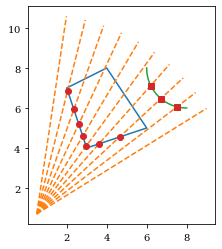

In [37]:
testAir()

### Magnetic field medium

Sometimes, a component may contain a magnetic field or the space between components is in a magnetic field.  In that case, a charged-particle traversing that medium will be deflected.  We will assume that the magnetic field always point out (or in) of the horizontal plane, so that the force exerted by the field is given by 

$$F=qv\gamma B=qpB\quad,$$ 

where $q$ is the electric charge of the particle, $v\gamma=\frac{p}{m}$ is the relativistic velocity of the particle, and $B$ is the (signed) magnetic field magnitude.  

The radius of the deflection is then given by solving 

\begin{align*}
  qv\gamma B &= \frac{m\gamma^2v^2}{r}\\
  r &= \frac{m\gamma v}{qB} = \frac{p}{qB}\quad,
\end{align*}

when $q\neq 0$.  Note, that the radius may be negative if the $q<0$ and $B>0$ or $q>0$ but $B<0$.  In a uniform magnetic field, the centre of the circular motion of the particle is then given by 

\begin{align*}
  \vec{c} &= r\frac{\vec{p}_{\perp}}{|\vec{p}|}+\vec{v}\\
          &= r\begin{bmatrix} -p_y\\p_x\end{bmatrix}\frac{1}{p}+\vec{v}\quad,
\end{align*}

where $\vec{p}_{\perp}/|\vec{p}|$ is the unit vector perpendiular to the motion of the particle, and $\vec{v}$ is it's current position in the magnetic field.  Note, this equation is correct even if $r<0$, since that case corresponds to a _clockwise_ revolution (as opposed to a _counter-clockwise_ for $r>0$), as discussed previously. 

Since the period of revolution is given by 

$$T=\frac{2\pi |r|}{\gamma v} = \frac{2\pi}{\gamma v}\frac{m\gamma v}{|qB|} = \frac{2\pi m}{|qB|}\quad,$$

where $m$ is the particle mass, we can calculate the time $t$ spend along the circular motion by the angle between $\vec{v}$ and $\vec{i}$ with respect to the centre of the circular motion $\vec{c}$ 

\begin{align*}
  \cos\vartheta &= \frac{(\vec{i}-\vec{c})(\vec{v}-\vec{c})}{|\vec{i}-\vec{c}||\vec{v}-\vec{c}|}\\
  t &= \frac{|\theta| m}{|qB|}\quad.
\end{align*}

We can thus choose the $s$ so that $t$ is the least of the two possibilities. 

If the particle is charged, then the momentum of the particle changes.  Thus, we need to calculate the new momentum at the point of intersection.  The direction is given as the tangent at the point of intersection $\vec{i}$ is perpendicular to the line $\vec{c}$ to $\vec{i}$, so we have 

$$\vec{p}' = p \frac{1}{r^2}\begin{bmatrix} -(i_y-c_y)\\(i_x - c_x)\end{bmatrix}\quad,$$ 

since the norm of the vector $\vec{i}-\vec{c}$ is by construction $r$, and the _magnitude_ of the momentum is not changed. 

Let us define our magnetic field medium class.  Each object will have an associated field magnitude $B$, which we must pass in upon construction. 

In [38]:
class MagneticField(Air):
    def __init__(self,b):
        super().__init__()
        self._b = b 

    def r(self,track,qB=None):
        from numpy import isclose 
        
        if qB is None:
            qB = track.type.q * self._b
            if isclose(qB,0): 
                return 0
        
        return track.pp / qB
        
    def c(self,track,r=None,qB=None):
        from numpy import array 
        
        if r is None:
            r = self.r(track,qB=qB)
        return r * array([-track.p[1], track.p[0]]) / track.pp + track.v
        
    def intersect(self,track,vertices=None,center=None,radius=None,theta1=0,theta2=-1):
        from numpy import abs, dot, isclose, sqrt, asarray, array
        from numpy.linalg import norm
        
        qB = track.type.q * self._b
        
        if isclose(qB,0) or isclose(track.pp,0):
            return super().intersect(track,vertices,center,radius,theta1,theta2)
            
        r = self.r(track,qB)
        c = self.c(track,r,qB)
        
        if vertices is not None:
            ret = arcAndPolygon(track.v,track.p,r,vertices,c)
        elif center is not None and radius is not None:
            ret = arcAndArc(track.v,track.p,r,center,radius,theta1,theta2,c)
        if ret is None:
            return None 
        
        a  = ret[0]
        i  = ret[1]
        ic = i - c 
        dp = track.pp / r * array([-ic[1],ic[0]])
        t  = a*track.type.m/abs(qB)
        
        return t, i, dp

No class is complete without a test case, so we implement one such here. 

In [39]:
def testBfld():
    from numpy import pi, sign, array, abs
    from matplotlib.pyplot import gca, figure
    
    verts = array([(3,4),(2,7),(4,8),(6,5),(3,4)])
    
    c = (8,8)
    r = 2
    theta1 = pi
    theta2 = 3*pi/2
    
    db   = ParticleDB()
    par  = Particle(db[2212],(.5,.7),(0,0))
    ps   = momenta(10,10,0,2*pi/3,v=verts,sa=.1,sb=.8)
    bfl  = MagneticField(1)
    
    figure()
    plotPolygon(verts,label='Polygon')
    plotArc(c,r,theta1,theta2,label='Arc',color='tab:green')
    
    
    for p in ps:
        track = Track(par,par.v,p,0)
        tr    = bfl.r(track)
        tc    = bfl.c(track,tr)
        plotDirArc(par.v,p,sign(tr),abs(tr),pi/3,'--',cc=tc,color='tab:orange')
        plotIntersect(bfl.intersect(track,vertices=verts),'o',color='tab:red',dp=0.2)
        plotIntersect(bfl.intersect(track,
                                    center=c,
                                    radius=r,
                                    theta1=theta1,
                                    theta2=theta2),
                      's', color='tab:green',dp=0.2)
        
        t  = bfl.intersect(track,vertices=verts)
            
    gca().set_aspect(1)

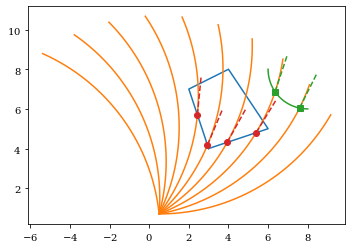

In [40]:
testBfld()

# Shapes 

Each component of our experimental setup will have a shape.  The obvious shapes are _polygons_ and _circles_, but in principle we can implement almost any shape - all we have to do, is to implement correct `intersect` methods for a shape.  Let us create a base class for shapes, which defines the expected interface.  In particular, we declare the method `intersect` which accepts 

- a tracking medium 
- a track 

Note, the method will expect the track coordinates and momentum in the local coordinate system of the shape.  It will return the time to and point of intersect, as well as the new direction vector, or if no intersect is found, `None`. 

For drawing purposes, we will also define the interface `v` which should return a list of vertices too plot.  In that way, we can let the shape define how it should be drawn.   If we want to draw several paths, this method can return several arrays in a list. 

In [41]:
class Shape:
    def __init__(self):
        raise NotImplementedError('Generic shape constructor called')
    
    def intersect(self,medium,track):
        raise NotImplementedError('Generic shape intersect method called')
        
    @property 
    def v(self): 
        raise NotImplementedError('Generic shape vertex method called')

## Polygon 

We define a derived class `Polygon` which implements the `Shape` interface.  We construct this shape from a list of vertices and close the path explicitly. 

In [42]:
class Polygon(Shape):
    def __init__(self,vertices):
        from numpy import asarray, vstack, allclose
        
        self._v = asarray(vertices)
        if not allclose(self._v[0],self._v[-1]):
            self._v = vstack((self._v, [self._v[0]]))
            
    def intersect(self,medium,track):
        return medium.intersect(track,vertices=self._v)
    
    @property
    def v(self): return [self._v]
    
    @property
    def n(self): return len(self._v)-1

## Rectangle 

We can make a further specialisation of the `Polygon` class to a _rectangle_.  Essentially, we only need to implement the constructor to call the `Polygon` constructor with appropriate arguments 

In [43]:
class Rectangle(Polygon):
    def __init__(self,width,height,center=(0,0)):
        from numpy import asarray
        self._c = asarray(center)
        self._w = width
        self._h = height
        super().__init__([[-width/2,-height/2],
                          [ width/2,-height/2],
                          [ width/2, height/2],
                          [-width/2, height/2]]+self._c)
        
    @property
    def c(self): return self._c 
    
    @property
    def w(self): return self._w
    
    @property
    def h(self): return self._h

## Arc 

Another basic shape is an arc.  This is characterized by radius $r$, centre $\vec{c}$, and two angles $\vartheta_1$ and $\vartheta_2$. 

In [44]:
class Arc(Shape):
    def __init__(self,radius,center=(0,0),theta1=0,theta2=-1):
        from numpy import asarray 
        
        self._r = radius 
        self._c = asarray(center)
        self._a = theta1
        self._b = theta2
        
    @property 
    def r(self): return self._r 
    
    @property
    def c(self): return self._c 
    
    @property 
    def a(self): return self._a 
    
    @property 
    def b(self): return self._b 
    
    @property
    def v(self):
        from numpy import linspace, pi, cos, sin, array
        
        c = 0    if self._b < self._a else self._a 
        d = 2*pi if self._b < self._a else self._b
        a = linspace(c,d,100)
        v = self._c + self._r * array([(cos(aa),sin(aa)) for aa in a])
    
        return [v]
    
    def intersect(self,medium,track):
        return medium.intersect(track,
                                center=self._c,radius=self._r,
                                theta1=self._a,theta2=self._b)

We use this function to test our shapes by drawing some objects 

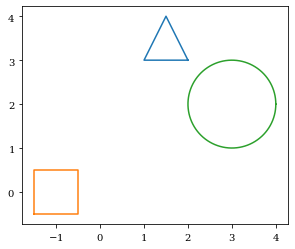

In [45]:
def testShape():
    from matplotlib.pyplot import gca, figure
    
    def drawShape(shape,**kwargs):
        from matplotlib.pyplot import plot 
        for v in shape.v:
            plot(v[:,0],v[:,1],**kwargs)
            
    figure()
    t = Polygon([(2,3),(1.5,4),(1,3)])
    r = Rectangle(1,1,center=(-1,0))
    c = Arc(1,center=(3,2))
    drawShape(t,label='Polygon')
    drawShape(r,label='Rectangle')
    drawShape(c,label='Arc')
    
    gca().set_aspect(1)
    
testShape()

# Coordinate transformations 

In general, we need to place experimental components somewhere in the plane of our experiment, and we need to be able to transform coordinates from the global coordinate system to the local coordinate system of the components.  Thus, we will develop the idea of _transformations_.  Generally, we will think of transformations as _translations_ followed by _rotations_.   Our base class for transformations will double as the identity transform - i.e., coordinates are not modified by the transformation.  We will also make this transform available as a class member `I`. 

In [46]:
class Transform:
    def __init__(self):
        pass 
    
    def to_local(self,p,shift=True):
        return p
    
    def to_global(self,p,shift=True):
        return p 
    
Transform.I = Transform()

## Pure translation 

We can implement a pure translation (i.e., no rotation) by a vector $\vec{t}$.  The transformations are then given by 

\begin{align*}
  \vec{p}_{\mathrm{local}} &= \vec{p}_{\mathrm{global}} - \vec{t}\\
  \vec{p}_{\mathrm{global}} &= \vec{p}_{\mathrm{local}} + \vec{t}\quad.
\end{align*}

Note, however, that we should _not_ perform this translation if the vector $\vec{p}$ represents a direction vector (e.g., momentum vector).  In that case, `shift=False`, the translation is identity. 

In [47]:
class Translation(Transform):
    def __init__(self,*args):
        from numpy import asarray 
        
        if len(args) == 1:
            self._t = asarray(*args)
        else: 
            self._t = asarray(args)
        
    def to_local(self,p,shift=True):
        return p - (self._t if shift else 0)
    
    def to_global(self,p,shift=True):
        return p + (self._t if shift else 0)

## Pure rotation 

A pure rotation (i.e., no translation) is then given by the rotation matrix 

$$M = \begin{bmatrix} \cos\vartheta & -\sin\vartheta\\ \sin\vartheta &\cos\vartheta\end{bmatrix}\quad,$$ 

for rotation angle $\vartheta$.  Note, we allow the rotation to be given in degrees if the keyword `degrees` is set to `True` in the constructor.  

A translation to the local coordinate system is given by 

$$\vec{p}_{\mathrm{local}} = M^T\vec{p}_{\mathrm{global}}\quad,$$

where 

$$M^T = \begin{bmatrix} \cos\vartheta & \sin\vartheta\\ -\sin\vartheta &\cos\vartheta\end{bmatrix}\quad,$$

is the transpose of $M$.  The transformation back to the global coordinate system is 

$$\vec{p}_{\mathrm{global}} = M\vec{p}_{\mathrm{local}}\quad.$$

Also note the transposition of the input vector `p` and back transpose after the matrix multiplication.  This allows us to pass a list of vectors for `p` and do the multiplication in parallel.  

In [48]:
class Rotation(Transform):
    def __init__(self,r=0,degrees=False):
        from numpy import deg2rad,sin,cos,array
        
        if degrees: r = deg2rad(r)
            
        self._m = array([[cos(r), -sin(r)],
                         [sin(r),  cos(r)]])
        
    def to_local(self,p,shift=True):
        from numpy import matmul
        
        return matmul(self._m.T, p.T).T
    
    def to_global(self,p,shift=True):
        from numpy import matmul
        
        return matmul(self._m, p.T).T

## Translation followed by rotation 

A combined transformation (translation followed by rotation) can be defined in terms of the two classes above.  The transformations are given by 


\begin{align*}
  \vec{p}_{\mathrm{local}} &= M^T(\vec{p}_{\mathrm{global}} - \vec{t})\\
  \vec{p}_{\mathrm{global}} &= M\vec{p}_{\mathrm{local}} + \vec{t}\quad.
\end{align*}

Again, we must take care to pass `shift=False` for direction vectors (such as momentum vectors). 

A technical note. The class `Combined` derive from _both_ `Translation` and `Rotation`, which in turn both implement the `Transform` interface.   This means we have to be a little careful when calling that method of each parent class. 

In [49]:
class Combined(Translation,Rotation):
    def __init__(self,t=0,r=0,degrees=False):
        Translation.__init__(self,t)
        Rotation   .__init__(self,r,degrees)
        
    def to_local(self,p,shift=True):
        return Rotation.to_local(self,Translation.to_local(self,p,shift),shift)
    
    def to_global(self,p,shift=True):
        return Translation.to_global(self,Rotation.to_global(self,p,shift),shift)

We tests these transforms by transforming arbitrary global coordinate to the local frame and then back again and check if they are the same (or close to the same). 

In [50]:
def testTransform():
    def testOne(t):
        from numpy import allclose
        from numpy.random import uniform, choice
        for p in uniform(-1,1,size=(100,2)):
            s = choice([True,False])
            l = t.to_local(p,s)
            g = t.to_global(l,s)
            assert allclose(p,g), '{}->{}->{} broken for {}'\
                .format(p,l,g,type(t))
        
        p = uniform(-1,1,size=(10,2))
        l = t.to_local(p)
        g = t.to_global(l)
        assert allclose(p,g), 'Array transform failed for {}'.format(type(t))
        
    testOne(Translation((1,0)))
    testOne(Rotation(45,True))
    testOne(Combined((1,0),45,True))
    
testTransform()

# Volumes

Next, we will define the components of the experimental setup.  A component will have a shape and a tracking medium and be placed, and possibly rotated, somewhere in the plane. Thus each component - here named `Volume` - will be characterised by 

- a name 
- a shape 
- a medium 
- a transformation

A volume will define the method `enter` which accepts a track in the global coordinate system and return whether or not the track will impinge on the volume. If it does, the method will return the time to and point of intersection, and change of direction at the point of intersect.  If the particle does not impinge, then the method will return `None`.   The  volume will find the intersection point by calling its shape `intersect` method, where the track coordinates have been translated to the local coordinate system of the volume.  In this way, we can reuse shapes over several volumes.  

If the steering algorithm finds that a given volume is the next volume to interact with, that steering algorithm will then call the found volumes `interact` method, passing a long the track in the local coordinate frame.  It is the responsibility of the volumes `interact` method to find the point where the track leaves the volume and possibly any measurements done by the volume.  The volume defines the method `exit` which finds the point of exit from the volume in the local coordinate frame. 

Furthermore, the `Volume` class defines methods for translating coordinate from the global coordinate system to the local coordinate system and back again as `to_local` and `to_global`, respectively, utilising the transformation of the volume.   Although volumes _can_ share transformations, it is often not the case. 

In [51]:
class Volume:
    def __init__(self,name,shape,medium=None,transform=None):
        if transform is None:
            transform = Transform.I 
        if medium is None:
            medium = Medium.Default 
        
        self._n = name
        self._s = shape
        self._m = medium
        self._t = transform 
        
    def enter(self,track,medium=None):
        m = self._m if medium is None else medium
        return self._s.intersect(m,track)
    
    def exit(self,track):
        return self._s.intersect(self._m,track)
    
    def interact(self,track):
        t = self.exit(track)
        if t is not None:
            return Track(track.o, t[1],t[2],track.t+t[0]),None

        return Track(track.o,track.v,(0,0),track.t), None
    
    def to_local(self,track):
        return Track(track.o,
                     self._t.to_local(track.v),
                     self._t.to_local(track.p,False),
                     track.t)
    
    def to_global(self,track):
        return Track(track.o,
                     self._t.to_global(track.v),
                     self._t.to_global(track.p,False),
                     track.t)
    
    @property 
    def n(self): return self._n 
    
    @property
    def s(self): return self._s 
    
    @property
    def m(self): return self._m 
    
    @property
    def t(self): return self._t 
    
    def __str__(self): return self.n

## Absorbing particles 

Note, a volume may set the returned tracks' momentum to the zero-vector $\vec{p}=0$.  This will signal to the steering algorithm that this track has died, and that algorithm will not propagate that track further.  This allows us to define a special kind of volume - an _arbsorber_ which will stop _any_ track that impinges on it.  Since we will do _no_ propagation of particles inside this volume, we will always define the tracking medium to be `Air` for volumes of this kind 

In [52]:
class Absorber(Volume):
    def __init__(self,name,shape,transform=None):
        super().__init__(name,shape,transform=transform)
        
    def interact(self,track):
        return Track(track.o,track.v,(0,0),track.t),None

First, we test by plotting the shape.  We make a component of size $1\times 1$, placed at $(2,3)$ and rotated by $\pi/6$. 

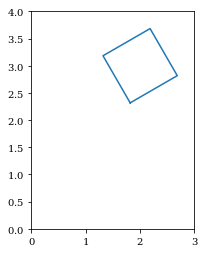

In [53]:
def testVolumeDraw():
    from numpy import pi 
    from matplotlib.pyplot import plot, gca, xlim, ylim, show, figure
    
    figure()
    v = Volume('V',Rectangle(1,1),Air(),Combined((2,3),pi/6))
    vv = v.t.to_global(v.s.v[0])
    plot(vv[:,0],vv[:,1])
    xlim(0,3)
    ylim(0,4)
    gca().set_aspect(1)
    show()
    
testVolumeDraw()

Next, we test translation from global to local and back to global coordinate system. 

In [54]:
def testVolumeTransform():
    from numpy.random import uniform 
    from numpy import allclose,pi
    
    v = Volume('V',Rectangle(1,1),Air(),Combined((2,3),pi/6))
    p = Particle(ParticleDB().random()[0],(0,0),(0,0))
    for x,y,pt,pz in uniform(size=(1000,4)):
        t = Track(p,(x,y),(pt,pz),0)
        l = v.to_local(t)
        g = v.to_global(l)
        assert allclose(t.v,g.v),\
            '{} -> {} -> {}'.format(t.v,l.v,g.v)
        assert allclose(t.p,g.p),\
            '{} -> {} -> {}'.format(t.p,l.p,g.p)
            
testVolumeTransform()

We will also test the `intersects` method by propagating some particles through

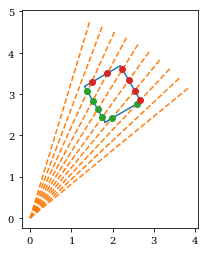

In [55]:
def testVolumeInteract():
    from numpy import arctan2,pi,linspace,array,cos,sin
    from matplotlib.pyplot import plot, gca, show, figure
    
    figure()
    v  = Volume('V',Rectangle(1,1),Air(),Combined((2,3),pi/6))
    op = Particle(ParticleDB().random()[0],(0,0),(0,0))
    ps = 5 * array([(cos(a),sin(a)) 
                    for a in linspace(7*pi/32,13*pi/32,10)])

    vv = v.t.to_global(v.s.v[0])
    plot(vv[:,0],vv[:,1])
    
    for p in ps:
        tr = Track(op,op.v,p,0)
        tp = array([tr.v,tr.v+tr.p])
        plot(tp[:,0],tp[:,1],'--',color='tab:orange')
        
        lt = v.to_local(tr)
        t  = v.enter(lt)
        
        if t is None: continue
              
        lt.update(t[1],t[2],lt.t+t[0])
        plot(*v.t.to_global(lt.v),'o',color='tab:green')
        
        t = v.exit(lt)
        
        if t is None: continue
              
        lt.update(t[1],t[2],lt.t+t[0])
        gt = v.to_global(lt)
        plot(*gt.v,'o',color='tab:red')
        
    gca().set_aspect(1)
        
testVolumeInteract()

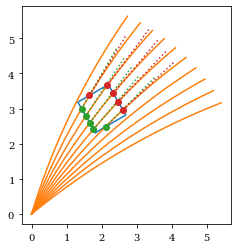

In [56]:
def testVolumeInteract2(pdg=211):
    from numpy import arctan2,pi,linspace,array,cos,sin, sign
    from matplotlib.pyplot import plot, gca, show, figure
    
    bf = MagneticField(.1)
    v  = Volume('V',Rectangle(1,1),bf,Combined((2,3),pi/6))
    op = Particle(ParticleDB()[pdg],(0,0),(0,0))
    ps = momenta(2,10,7*pi/32,13*pi/32)
    
    figure()
    vv = v.t.to_global(v.s.v[0])
    plot(vv[:,0],vv[:,1])
    
    for p in ps:
        tr = Track(op,op.v,p,0)
        
        r    = bf.r(tr)
        c    = bf.c(tr,r=r)
        plotDirArc(op.v,p,sign(r),abs(r),pi/10,'--',cc=c,color='tab:orange')
        
        lt = v.to_local(tr)
        rt = v.enter(lt)
        
        if rt is None: continue
              
        lt.update(rt[1],rt[2],lt.t+rt[0])
        gt = v.to_global(lt)
        plot(*gt.v,'o',color='tab:green')
        np = array([gt.v,gt.v+gt.p])
        plot(np[:,0],np[:,1],':',color='tab:green')
        
        rt = v.exit(lt)
        
        if rt is None: continue
              
        lt.update(rt[1],rt[2],lt.t+rt[0])
        gt = v.to_global(lt)
        plot(*gt.v,'o',color='tab:red')
        np = array([gt.v,gt.v+gt.p])
        plot(np[:,0],np[:,1],':',color='tab:red')
        
    gca().set_aspect(1)
        
testVolumeInteract2(-211)

The above example hints at how we will do the general steering of the simulation.  We will expand and implement this in the next section 

# Steering 

Having defined what we mean by a particle and what we mean by an experimental component, we are now ready to set-up our steering code.  This code will in general _steer_ our toy simulation.  It is the responsibility of this code, given a particle, to

- figure out which component the particle will next interact with, if any
    - ask the component to interact with the particle 
    - update particle position and momentum after the interaction 
    - recording any kind of measurement done by a component 
- continue until the particle no longer impinges on any component, and then repeat the process for more particles.  

## Measurements 

While propagating a particle through our experiment, we would like to record measurements of the particle.  Here, we will define a generic measurement which contains 

- $(x,y)$ coordinates of the measurement 
- $t$ - the time of the measurement 

Implementations of the `Volume` interface is expected to return a list of any such measurement, in so far as the derived class represent a detector of some sort.  One can in principle define derived classes from this class to give customised measurements back from a customised `Volume`.  We will not do so here, but in real-life applications that would very much be the norm. 

In [57]:
class Measurement: 
    def __init__(self,pos,t):
        self._v = pos
        self._t = t
        
    @property 
    def v(self): return self._v
    
    @property 
    def x(self): return self._v[0]
    
    @property
    def y(self): return self._v[1]
    
    @property
    def t(self): return self._t
    
    def __str__(self): return "({},{}),{}".format(self.x,self.y,self.t)

## History 

We want to keep track of the particles as we swim them through the experiment.  In particular, we want to have a record of 

- Measurements
- Changes in momentum 
- Changes in position 

Thus, when swimming a particle through the experimental set-up, we will wrap each particle in a `History` object which will keep track of those things.  We can then query the history object for information such as last known position and last known momentum which we will use to find the next component to interact with. 

In [58]:
class History: 
    def __init__(self,vol,track):
        self._p = track.o   # The particle 
        self._i = []        # Interactions (pos,momentum,time,measurements)
        self._push('*',vol,track, None)
        
    def _push(self,what,vol,track,m=None):
        try:
            iter(m)
            mm = m 
        except:
            mm = None if m is None else [m]
        self._i.append((what,vol,track.v, track.p, track.t, mm))
    
    def enter(self,vol,track): self._push('>',vol,track)
        
    def exit(self,vol,track,m): self._push('<',vol,track,m)
        
    def dead(self,vol,track): self._push('x',vol,track)

    def end(self,vol,track): self._push('|',vol,track)
        
    def _prop(self,i):
        from numpy import asarray  
        return asarray([r[i] for r in self._i])
    
    @property
    def coordinates(self):
        return self._prop(2)
           
    @property
    def times(self):
        return self._prop(4)
    
    @property
    def momenta(self):
        return self._prop(3)
    
    @property
    def measurements(self):
        from numpy import asarray
        
        return asarray([m.v for  _,_,_,_,_,s in self._i 
                        if s is not None
                        for m in s 
                        if isinstance(m,Measurement)])

    @property
    def particle(self): return self._p
    
    def __str__(self):
        r =  [str(self._p)]
        r += ['  {:3d} {:8.2g} {} {:8s} @ ({:8.2f},{:8.2f}) [{:8.2g},{:8.2f}]{}'\
              .format(i,t,w,n,v[0],v[1],p[0],p[1], ' *' if m is not None else '')
              for i,(w,n,v,p,t,m) in enumerate(self._i)]
        return '\n'.join(r)

## Algorithm

Finally, we can define our steering class.  This class will a container of `Volume` objects which we want to swim particles through.  We will also give a _mother_ volume which defines the tracking medium of the space _between_ detectors and which sets the bounds for propagation of particles.  Again, tracking media can be shared among components and thus also with the steering mother volume.  The mother volumes `interact` method will never be called. 

The method `swim` then accepts a single particle, finds the components to interact with in turn, and does the interaction.  The method then returns a `History` object.   The algorithm goes as follows 

- Find the next volume the particle will interact with, where _next_ means the volume with the shortest time-to-intersect for the particle. 
- If no such volume can be found, stop tracking the particle 
- Transform the coordinates and momentum of the track to the local frame of the volume, and pass the (local) track to the volumes `interact` method.  This method will in turn return the time-to-exit and point of exit, as well as any change in momentum - all in the local frame of the component - and possibly a list of measurements. 
- If the volume returns an error (e.g. `None`) or sets the tracks' momentum to 0, then we stop the tracking of this particle.  
- We transform the track coordinates and momentum back to the global frame and record any changes in our history. 
- If the volume we interacted with is the _mother_ volume, we are at the edge of the experiment, and we stop tracking.  
- Otherwise, we repeat the steps above until the particle dies ($\vec{p}=0$) or it reaches the edge of the set-up as defined by the _mother_ volume. 

The utility functions `_find` and `_one` are used to find the next component to interact with (if any), and lets that component interact with the particle, respectively.  The method `_more` checks if we have more to do for the current particle.   We may stop the interaction of the particle under a number of conditions 

- The particle momentum is zero $\vec{p}=0$. 
- The maximum number of steps (if defined) has been reached 
- The maximum simulated time of propagation (if set) has been reach
- The particle has reach the outer bound set by the _mother_ volume. 

If any of these conditions are met we stop propagating the particle. 

In [59]:
class Steer:
    def __init__(self,mother,volumes):
        self._c = volumes + [mother]
        self._m = mother
        
    @property
    def volumes(self):
        return self._c[:-1]
    
    @property
    def mother(self):
        return self._m
    
    def _more(self,track,step,maxt,maxstep):
        from numpy import isclose, abs 
        if maxstep is not None and step > maxstep: return False
        if maxt is not None and track.t         > maxt: return False 
        
        return True 
    
    def swim(self,p,maxt=None,maxstep=1000):
        from numpy import array, isclose
        
        t     = Track(p,p.v,p.p,0)          
        h     = History(self._m.n,t)
        step  = 0
        
        while self._more(t,step,maxt,maxstep):
            cand = self._find(t)
            
            if cand is None:
                break
                
            tt, cc, lt = cand
            t  = cc.to_global(lt)
            
            if cc is self._m:
                h.end(cc.n,t)
                break
            
            h.enter(cc.n,t)
            rt, m = self._one(cc, lt)
            t.update(rt.v, rt.p, rt.t)
            h.exit(cc.n, t, m)
            
            if isclose(t.pp,0):
                h.dead(cc.n, t)
                break
        
            step += 1
            
        return h
        
    def _find(self,track):
        def f(track,c):
            t = c.enter(c.to_local(track),self._m.m)
            return None if t is None else (*t,c) 
        
        cand = earliest(*[f(track,c) for c in self._c])
        if cand is None: return None 
        
        tt,vv,pp,cc = cand
        return tt, cc, Track(track.o,vv,pp,track.t+tt)

    def _one(self,c,lt):
        rt, meas = c.interact(lt)
        gt       = c.to_global(rt)
        return gt, meas

Again, we test our class immediately so we know it works and do not keep working on something broken.  Note, we define a test class that contains most of our stuff, just to make it easier on us later on. 

In [60]:
class Test1:
    def __init__(self):
        air      = Air()
        self._db = ParticleDB()
        v1       = Volume('V1',Rectangle(1,1),air,Translation(3,0))
        v2       = Volume('V2',Rectangle(1,1),air,Translation(6,0))
        m        = Volume('M', Rectangle(8,2),air,Translation(3,0))
        self._s  = Steer(m,[v1,v2])
        
    def shoot(self):
        p = Particle(self._db.random()[0],(0,0),[1,0])
        h = self._s.swim(p)
        return h

$\pi^-$
    0        0 * M        @ (    0.00,    0.00) [       1,    0.00]
    1      2.5 > V1       @ (    2.50,    0.00) [       1,    0.00]
    2      3.5 < V1       @ (    3.50,    0.00) [       1,    0.00]
    3      5.5 > V2       @ (    5.50,    0.00) [       1,    0.00]
    4      6.5 < V2       @ (    6.50,    0.00) [       1,    0.00]
    5        7 | M        @ (    7.00,    0.00) [       1,    0.00]


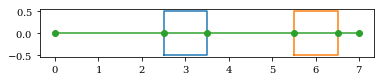

In [61]:
def testSteer1():
    from matplotlib.pyplot import plot,gca, figure
    
    figure()
    t = Test1()
    h = t.shoot()
    
    for v in t._s.volumes:
        vv = v.t.to_global(v.s.v[0])
        plot(vv[:,0],vv[:,1],label=v.n)
    print(h)
    hc  = h.coordinates
    plot(hc[:,0],hc[:,1],'-o')
    gca().set_aspect(1)
    
testSteer1()

# Visualisation 

To make life a little easier for us, we define a few functions to visualise our toy simulation.  First, we start with a function to draw a component.  We allow the user to give all the regular plotting keywords via the argument `**kwargs`

In [62]:
def plotVolume(v,*args,**kwargs):
    from matplotlib.pyplot import gca
    
    ax = kwargs.pop('ax',gca())
    
    for vv in v.s.v:
        uu = v.t.to_global(vv)
        ax.plot(uu[:,0],uu[:,1],*args,label=v.n,**kwargs)

In [63]:
def plotSteer(s,*args,**kwargs):
    from matplotlib.pyplot import plot, gca
    
    ax = kwargs.pop('ax',gca())
    
    for v in s.volumes:
        kwargs['ax'] = ax
        plotVolume(v,*args,**kwargs)

The next plotting function will take a history of a particle trajectory and plot the history coordinates.  Negatively charged particles are coloured red, positive blue, and neutral particles brown, unless a specific `color` keyword is given.  Likewise, the width of the line is set by the mass of the particle (heavy particles have heavier lines) unless a `linewidth` is specified. 

In [64]:
def plotHistory(h,*args,**kwargs):
    from matplotlib.pyplot import plot, gca 
    
    ax = kwargs.pop('ax',gca())
    
    p   = h.particle 
    col = ('tab:red'  if p.type.q < 0 else 
           'tab:blue' if p.type.q > 0 else 
           'tab:brown')
    lw  = (10 * p.type.m) // 4 + 1
    
    if 'lw' not in kwargs or 'linewidth' not in kwargs:
        kwargs['lw'] = lw 
    if 'color' not in kwargs:
        kwargs['color'] = col 
        
    hc = h.coordinates
    if hc is None: return
    if ax is None: ax = gca()
    
    return ax.plot(hc[:,0],hc[:,1],*args,**kwargs)

We may also want to plot the measurements made during the swim.  

In [65]:
def plotMeasurements(h,*args,**kwargs):
    from matplotlib.pyplot import plot, gca 
    
    hm = h.measurements
    if hm is None or len(hm) < 1: return
    ax = kwargs.pop('ax',gca())
        
    return ax.plot(hm[:,0],hm[:,1],*args,**kwargs)

Let us run another test 

In [66]:
class Test2(Test1):
    def __init__(self):
        super().__init__()
        
    def show(self):
        from matplotlib.pyplot import figure,gca,legend,axis
        
        fig = figure(figsize=(8,3))
        plotSteer(self._s)
        gca().set_aspect(1)
        axis('off')
        legend();
        
    def shoot(self,a):
        from numpy import cos, sin
        p  = Particle(self._db.random()[0],(0,0),[cos(a),sin(a)])
        h  = self._s.swim(p)
        plotHistory(h,'o--',label=str(p),ms=4)
        
    def run(self,n=5):
        from numpy.random import uniform
        self.show()
        for a in uniform(-.1,+.1,size=n):
            self.shoot(a)

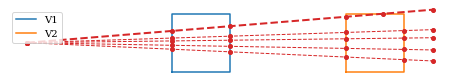

In [67]:
t = Test2()
t.run()

# Some more interesting componets 

Here we will define some more interesting components

## A tracker 

This component will essentially perform like the `Volume` class above, except we will add measurements of the particle trajectory along the path of the particle.  We take advantage of the class `Rectangle` already defined, and simply overload the method `interact` to give the additional information.  Note, we only produce measurements for _charged_ particles.  We randomize the measurements a bit along the length of the detector - to simulate a random process of energy deposition. 

In [68]:
class Tracker(Volume):
    def __init__(self,name,width,height,medium,transform,eff=.7):
        super().__init__(name,Rectangle(width,height),medium,transform)
        self._e = eff
        
    def interact(self,track):
        from numpy import arange
        from numpy.random import uniform
        
        ret, _ = super().interact(track)
        if track.type.q == 0: return ret, None  # not charged
        
        v = track.v 
        d = ret.v - v
        s = 0
        m = [Measurement(self.t.to_global(v + s * d),track.t+s) 
             for s in arange(.1,1,.1) if uniform() > self._e]
        
        return ret, m

## A Time-of-flight detector 

This detector will again be similar to the `Volume` component, but for charge particles we will add a measurement at the half-way point between the entry and the exit point 

In [69]:
class TOF(Volume):
    def __init__(self,name,width,height,medium,transform,eff=.7):
        super().__init__(name,Rectangle(width,height),medium,transform)
        self._e = eff
        
    def interact(self,track):
        from numpy.random import uniform
        
        ret, _ = super().interact(track)
        if ret is None or track.type.q == 0 or uniform() > self._e:  
            return ret, None  # not charged
        
        return ret, Measurement(self.t.to_global((ret.v+track.v)/2),track.t)

Let us see how this works in action 

In [70]:
class Test3:
    def __init__(self):
        from numpy import pi 
        self._db = ParticleDB()
        air = Air()
        m   = Volume ('M',  Rectangle(6,2),air,Translation(2,0))
        t1  = Tracker('T1', 1, 1,          air,Combined((3,0), pi/10))
        w1  = TOF    ('W1', .1,1,          air,Combined((4,.2),pi/10))
        self._s = Steer(m,[t1,w1])

    def show(self):
        from matplotlib.pyplot import figure
        
        fig = figure(figsize=(8,3))
        plotSteer(self._s)

    def shoot(self,a):
        from numpy import cos, sin
        p  = Particle(self._db.random()[0],(0,0),[cos(a),sin(a)])
        h  = self._s.swim(p)
        l  = plotHistory(h,'--o',label=str(p),ms=4)
        plotMeasurements(h,'*',ms=10,color=l[0].get_color())
        
    def run(self):
        from matplotlib.pyplot import gca, legend, axis
        from numpy.random import uniform
    
        self.show()
        for a in uniform(-.1, +.1,size=5):
            self.shoot(a)
        
        gca().set_aspect(1)
        axis('off')
        legend(loc='center left',bbox_to_anchor=(1, 1));

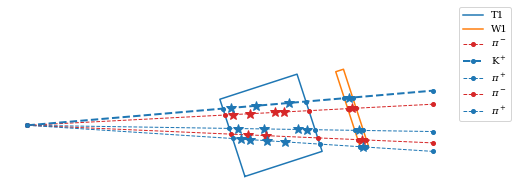

In [71]:
t = Test3()
t.run()

## A magent

This component is a little special.  First of all, it does not allow entry from all sides.  If a particle does not enter on the front or back face, then the particle is stopped because it is presumably absorbed in the iron of the magnet.  Secondly, the path of the particles through the detector isn't a straight line, so we need to do a bit more calculations.  And finally, a magnet does not allow for measurements.   

Here, we will assume a uniform magnet field pointing out of the plane.  That means that a charge particle trajectory will bend in-plane when passing through the magnet.  Non-charged particles are of course not effected. 

We will force the tracking medium `MagneticField` here, and then we need to do a bit extra calculations to ensure that the particle enters and exists on the ends of the box 

In [72]:
class Magnet(Volume):
    def __init__(self,name,width,height,transform,b=1):
        super().__init__(name,Rectangle(width,height),MagneticField(b),transform)
        
    def _onedge(self,v):
        from numpy import isclose
        
        return (isclose(v[0],-self.s._w/2) or 
                isclose(v[0],self.s._w/2) and 
                (-self.s._h / 2 < v[1] < self.s._h / 2))
            
    def interact(self,track):
        if not self._onedge(track.v):
            return Track(track.o,track.v,(0,0),track.t),None
        
        ret, _ = super().interact(track)
        
        if not self._onedge(ret.v):
            return Track(track.o,ret.v,(0,0),ret.t),None
        
        return ret, None

Let us add a magnet to our set-up and run some particles through.

In [73]:
class Test4:
    def __init__(self):
        air = Air()
        m   = Volume ('M',  Rectangle(11,2),air,Translation(4,0))
        t1  = Tracker('T1', 1, 1,           air,Translation(3,0))
        d1  = Magnet ('D1', 1,.5,               Translation(5,0))
        t2  = Tracker('T2', 1, 1,           air,Translation(7,0))
        w1  = TOF    ('W1', .1,1,           air,Translation(9,0))
        self._l = [t1,d1,t2,w1]
        self._m = m
        self._s = None 
        self._db = ParticleDB()
        
    def setup(self):
        if self._s is None:
             self._s = Steer(self._m, self._l)
                
    def show(self):
        from matplotlib.pyplot import figure,axis
        
        self.setup()
        fig = figure(figsize=(8,3))
        plotSteer(self._s)
        axis('off')

    def shoot(self,a):
        from numpy import cos, sin, array
        self.setup()
        
        pp = 2 * array([cos(a),sin(a)])
        p  = Particle(self._db.random()[0],(0,0),pp)
        h  = self._s.swim(p)
        l = plotHistory(h,'--o',label=str(p),ms=4)
        plotMeasurements(h,'*',ms=10,color=l[0].get_color())
        
    def run(self):
        from matplotlib.pyplot import gca, legend
        from numpy.random import uniform
    
        self.setup()
        self.show()
        for a in uniform(-.08, +.08,size=5):
            self.shoot(a)
        
        gca().set_aspect(1)
        legend(ncol=2,loc='lower left',bbox_to_anchor=(1,1))

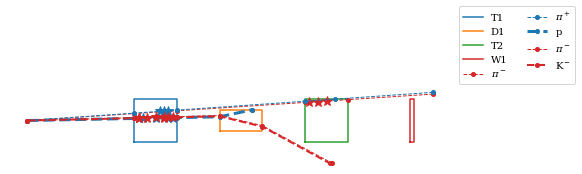

In [74]:
t = Test4()
t.run() 

Let us add to absorbers to the previous set-up - one on either side of the magnet, simulating the yoke of the magnet

In [75]:
class Test5(Test4):
    def __init__(self):
        super().__init__()
        self._l.append(Absorber('A1',Rectangle(1,.4),Translation(5,.45)))
        self._l.append(Absorber('A2',Rectangle(1,.5),Translation(5,-.5)))

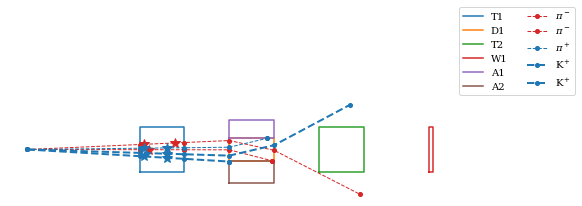

In [76]:
t = Test5()
t.run()

# An (almost) complete example - BRAHMS

The heavy-ion experiment [BRAHMS](https://www4.rcf.bnl.gov/brahms/WWW/) at the Brookhaven Laboratory [RHIC](https://www.bnl.gov/RHIC/) consisted of two spectrometer arms with small opening angles.  The spectrometer arms where the _Forward spectrometer_ (FS) and the _Midrapidity spectrometer_ (MRS) and where each placed on platforms that allowed them to be rotated around the collision point.  Thus, even though each spectrometer had a small opening angle for measuring particles, BRAHMS could cover a very large range of rapidity with excellent resolution in momentum and particle identification. 

Here, we will model the midrapidity spectrometer and the first half of the forward spectrometer.  We will allow for different angles of rotation for each spectrometer ($2.3^{\circ}$ to $30^{\circ}$ for FS and $30^{\circ}$ to $92^{\circ}$ for the MRS).

In [77]:
class BRAHMS:
    def __init__(self,fs,mrs):
        self._db = ParticleDB()
        
        air = Medium.Default
        m   = Volume('Cave',Rectangle(14,10.5),air,Translation(6,-.7))
        l   = [] 
        self.fs (l, fs,  air)
        self.mrs(l, mrs, air)
        self._s = Steer(m, l)
        
    def _t(self,rad,x,y,da):
        from numpy import asarray
        r = Rotation(rad)
        g = r.to_global(asarray((x,y)))
        return Combined(g,rad+da)
    
    def fs(self,l,angle,air):
        from numpy import deg2rad, matmul, array,cos,sin 
        if angle < 2.3 or angle > 30:
            raise ValueError('Invalid angle {} for FS'.format(angle))
        
        air  = Medium.Default
        rad  = deg2rad(-angle)
        offx = 5.5
        offy = -.25
        d1 = Magnet ('D1',2.00,0.20,self._t(rad,offx,offy-0.01,+0.00),6)
        offx += 3.75
        offy -= .2
        t1   = Tracker('T1',0.70,0.34,air,self._t(rad,offx-2.14,offy+0.07,+0.02))
        d2   = Magnet ('D2',1.60,0.30,    self._t(rad,offx-0.71,offy-0.02,-0.03),7.5)
        t2   = Tracker('T2',0.76,0.40,air,self._t(rad,offx+0.93,offy-0.03,-0.07))
        h1   = TOF    ('H1',0.04,0.40,air,self._t(rad,offx+1.49,offy-0.05,-0.07))
        
        l += [d1,t1,d2,t2,h1]
        
    def mrs(self,l,angle,air):
        from numpy import deg2rad, matmul, array,cos,sin 
        if angle < 30 or angle > 95:
            raise ValueError('Invalid angle {} for MRS'.format(angle))
        
        air  = Medium.Default
        rad  = deg2rad(angle)
        offx = 1.96
        offy = 0
        m1   = Tracker('M1',0.36,0.36,air,self._t(rad,offx-1.01,offy-0.22,0))
        d5   = Magnet ('D5',0.74,0.35,    self._t(rad,offx-0.06,offy-0.06,0), 4)
        m2   = Tracker('M2',0.66,0.50,air,self._t(rad,offx+0.96,offy-0.22,0))
        offx = 4.15
        offy = 0
        w1   = TOF    ('W1',0.02,0.26,air,self._t(rad,offx+0.13,offy+0.55,+0.21))
        w2   = TOF    ('W2',0.02,0.26,air,self._t(rad,offx+0.17,offy+0.27,+0.10)) 
        w3   = TOF    ('W3',0.02,0.26,air,self._t(rad,offx+0.19,offy-0.01,+0.00)) 
    
        l += [m1,d5,m2,w1,w2,w3]
        
    def show(self):
        from matplotlib.pyplot import figure,gca,legend, axhline,axis,fill
        
        fig = figure(figsize=(8,8))
        colm = {id(Tracker):'tab:blue',
                id(TOF):    'tab:olive',
                id(Magnet): 'tab:purple'}
        for v in self._s.volumes:
            col  = colm[id(type(v))]
            plotVolume(v,color=col)
            for vv in v.s.v:
                uu = v.t.to_global(vv)
                fill(uu[:,0],uu[:,1],color=col,alpha=.33)
    
        axhline(0,color='black',label='Beam')
        
        axis('off')
        gca().set_aspect(1)
        legend(ncol=3,fontsize=12) 
        
    def shoot(self,ang=-8,mom=12):
        from numpy import sin, cos,array 
        
        pp = mom * array((cos(ang),sin(ang)))
        p = Particle(self._db.random()[0],(0,0),pp)
        h = self._s.swim(p)
        l = plotHistory(h,'--o',label=str(p),ms=4)
        plotMeasurements(h,'*',ms=10,color=l[0].get_color())
        # print(h)
        
    def run(self,n=3,a1=-8,a2=90):
        from numpy import deg2rad
        from numpy.random import uniform, seed
        from matplotlib.pyplot import gca 
        
        self.show()
        
        for a in uniform(a1-2,a1+2,size=n):
            self.shoot(deg2rad(a),12)
            
        for a in uniform(a2-5,a2+5,size=n):
            self.shoot(deg2rad(a),12)
     

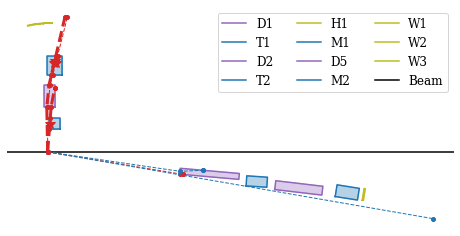

In [78]:
brahms = BRAHMS(5,90)
brahms.run()

In the construction above we can change the angles if we like, and we can pass how may particles in each direction we want to throw 

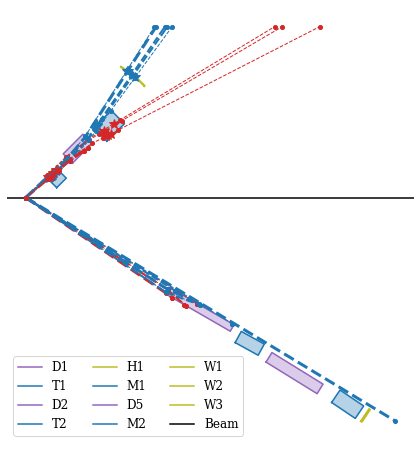

In [79]:
brahms = BRAHMS(30,45)
brahms.run(10,-33,43)

# An "Onion" detector 

A classical design of an experiment in high-energy particle physics is the so called _onion_ design.  That is, the experiment is comprised of a set of detectors - embedded in a magnetic field parallel to the beam-axis - forming more or less concentric rings around the beam pipe - as layers in an onion.  

Here, we will make a simple design of such an experiment.  

## Ring shape 

First, we need the concept of a _ring_ shaped volume.  This volume will have an inner and outer circular periphery.  We define a new shape that does this for us by using two `Arc` objects.  Note, in the `intersect` method we have to check which of the peripheries we hit first 

In [80]:
class Ring(Shape):
    def __init__(self,inner,outer,center=(0,0)):
        self._i = Arc(inner,center)
        self._o = Arc(outer,center)
    
    @property
    def v(self):
        return self._i.v + self._o.v
    
    def intersect(self,medium,track):
        it = self._i.intersect(medium,track)
        ot = self._o.intersect(medium,track)
        if it is not None and (ot is None or it[0] < ot[0]):
            return it 
        if ot is not None and (it is None or ot[0] < it[0]):
            return ot 
        return None    

To draw such a ring nicely, we need to do a bit of gymnastics, so we will define a function to help us out 

In [81]:
def plotRing(r,transform=None,*args,**kwargs):
    from numpy import asarray, ravel
    from matplotlib.pyplot import plot, fill, gca
    
    ax = kwargs.pop('ax',gca())
        
    v = r.v
    if transform is not None:
        v = [transform.to_global(vv) for vv in v]
    vx = asarray([[x for x,y in vv] for vv in v])
    vy = asarray([[y for x,y in vv] for vv in v])
    vx[1,:] = vx[1,::-1]
    vy[1,:] = vy[1,::-1]
    
    if 'alpha' not in kwargs:
        kwargs['alpha'] = .2
    
    edge = None
    if 'edgecolor' in kwargs:
        edge = kwargs['edgecolor']
        del kwargs['edgecolor']
        
    if 'color' in kwargs:
        if 'facecolor' not in kwargs:
            kwargs['facecolor'] = kwargs['color']
        edge = kwargs['color']
        del kwargs['color']
        
    f = ax.fill(ravel(vx),ravel(vy),**kwargs)
    if 'facecolor' in kwargs:
        del kwargs['facecolor']
    if 'color' not in kwargs:
        kwargs['color'] = edge if edge is not None else f[0].get_facecolor()
    if 'alpha' in kwargs:
        del kwargs['alpha']
    if 'label' in kwargs:
        del kwargs['label']
        
    for vv in v:
        ax.plot(vv[:,0],vv[:,1],*args,**kwargs)

First, a simple test by drawing the shape

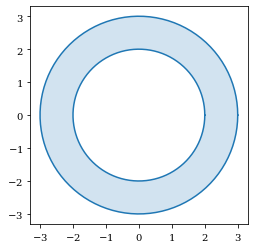

In [82]:
def testRing():
    from numpy import asarray,ravel
    from matplotlib.pyplot import gca,figure
    
    figure()
    r = Ring(2,3)
    plotRing(r,color='tab:blue')
    
    gca().set_aspect(1)
    
testRing()

## A Polygon band

The next shape we want, is a regular polygon with $n$ sides, with a certain inner and outer radius.  We use the same scheme as we did for the `Ring` class, except this time we have two inner `Polygon` objects 

In [83]:
class PolyRing(Shape):
    def __init__(self,n,inner,outer,center=(0,0)):
        from numpy import linspace, cos, sin, asarray, pi
        
        c = asarray(center)
        v = asarray([(cos(a),sin(a)) for a in linspace(0,2*pi,n+1)])
        self._i = Polygon(c + inner * v)
        self._o = Polygon(c + outer * v)
    
    @property
    def v(self):
        return self._i.v + self._o.v
    
    def intersect(self,medium,track):
        it = self._i.intersect(medium,track)
        ot = self._o.intersect(medium,track)
        ret = None
        if it is not None and (ot is None or it[0] < ot[0]):
            ret = it 
        if ot is not None and (it is None or ot[0] < it[0]):
            ret = ot
       
        return ret    

Again, we draw the shape of the poly ring 

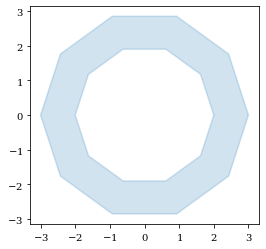

In [84]:
def testPolyRing(n=10):
    from numpy import asarray,ravel
    from matplotlib.pyplot import gca, figure
    
    figure()
    r = PolyRing(n,2,3)
    plotRing(r)
    gca().set_aspect(1)

testPolyRing()    

## Some specific volumes 

We will define four kinds of volumes 

- Inner tracker volumes with shape `PolyRing`.  This will give a single measurement on each layer.  
- A large TPC with the shape `Ring`.  This will give measurements along the track.  Note, since this detector is embedded in a magnetic field, we need to find the curvature of the track propagated, and make measurements along that trajectory 
- A time-of-flight volume with the shape `PolyRing`. Again, this will give a single measurement. 
- A large magnet in the shape of an octagon. The magnet will also work as an `Absorber`, stopping any track that impinges on it.  

Inside the magnet, everything is in an magnetic field, so we create that medium and pass that as the tracking medium for all our volumes, including the mother volume. 

### Inner tracker layers 

This are thin layers, for example of silicon pixel detector elements. 

In [85]:
class Inner(Volume):
    def __init__(self,name,bfl,n,radius,thickness=0.01,efficiency=.99):
        super().__init__(name,PolyRing(n,radius,radius+thickness),bfl)
        self._e = efficiency 
        
    def interact(self,track):
        from numpy.random import uniform
        
        ret, _ = super().interact(track)
        if ret is None or track.type.q == 0 or uniform() > self._e:  
            return ret, None  # not charged
        
        return ret, Measurement(self.t.to_global((ret.v+track.v)/2),track.t)

### Time of flight barrel 

This is a layer of detectors with high timing resolution, for example scintilators or micro-channel plates. 

In [86]:
class FT(Volume):
    def __init__(self,name,bfl,n,radius,thickness=0.1,efficiency=.9):
        super().__init__(name,PolyRing(n,radius,radius+thickness),bfl)
        self._e = efficiency 
        
    def interact(self,track):
        from numpy.random import uniform
        
        ret, _ = super().interact(track)
        if ret is None or track.type.q == 0 or uniform() > self._e:  
            return ret, None  # not charged
        
        return ret, Measurement(self.t.to_global((ret.v+track.v)/2),track.t)

### Magnet 

This is a large solenoidal magnet with a $B$ field pointing in (or out) of the plane.  This volume doubles as an `Absorber` causing all tracks to stop at the edges of this volume.  

In [87]:
class Solenoid(Absorber):
        def __init__(self,name,radius,thickness=.8):
            from numpy import pi
            super().__init__(name,PolyRing(8,radius,radius+thickness),
                             Rotation(pi/8))

### A TPC - the main part of the experiment 

A TPC is a large volume fill with a gas that allows measurements of $(x,y,z)$ coordinates with high precision.  This volume is a little special, in that we have to follow the curved trajectory of a particle to generate our measurements from this detector. 

In [88]:
class TPC(Volume):
    def __init__(self,name,bfl,inner,outer,efficiency=.99):
        super().__init__(name,Ring(inner,outer),bfl)
        self._e = efficiency
        
    def _angle(self,v,c):
        from numpy import arctan2, pi
        
        a = arctan2(v[1]-c[1],v[0]-c[0])
        # if a < 0: a += 2*pi 
            
        return a 
    
    def interact(self,track):
        from numpy import asarray,linspace,sin,cos
        from numpy.random import uniform
        
        ret, _ = super().interact(track)
        if ret is None or track.type.q == 0:  
            return ret, None  # not charged
        
        try:
            r  = self.m.r(track)
            c  = self.m.c(track,r)
            a  = self._angle(track.v, c)
            b  = self._angle(ret.v,   c)
            if track.type.q < 0:
                a, b = b, a
                
            qr = track.type.q * r
            t  = [Measurement(self.t.to_global(c+qr*asarray((cos(aa),sin(aa)))),
                             track.t+aa)
                 for aa in linspace(a,b,50)
                  if uniform() < self._e]
        except Exception as e:
            print('Failed to make TPC measurements: ',e)
            return ret, None 
        return ret, t

## The whole thing 

We can now put the whole onion together.  We have a magnetic field of $0.5\mathrm{T}$ over the whole setup, and we define 6 inner layers of trackers, a single large TPC, a layer of timing detector, and our magnet volume.  We define some specialised visualisation of the volumes and particles are generated with an exponential distribution of the transverse momentum $p_{\mathrm{T}}$ and a uniform azimuthal ($\varphi$) distribution.  We enforce a low $p_{\mathrm{T}}$ cut-off, since low transverse momentum particles will never propagate.  

In [89]:
class Onion:
    def __init__(self,b=0.25):
        bfl = MagneticField(b)
        m   = Volume('M',Rectangle(12,12),bfl)
        i1  = Inner('I1',bfl,10,0.05)
        i2  = Inner('I2',bfl,10,0.10)
        i3  = Inner('I3',bfl,12,0.25)
        i4  = Inner('I4',bfl,12,0.35)
        i5  = Inner('I5',bfl,16,0.60)
        i6  = Inner('I6',bfl,16,0.75)
        tpc = TPC('TPC',bfl,1,3)
        tof = FT('TOF',bfl,24,3.5)
        l3  = Solenoid('MAG',5)
        self._db = ParticleDB()
        self._s  = Steer(m,[i1,i2,i3,i4,i5,i6,tpc,tof,l3])
        
    def show(self):
        from matplotlib.pyplot import figure,gca,legend,axis
        
        fig = figure(figsize=(8,8))
        colm = {id(Inner):    'tab:blue',
                id(TPC):      'tab:olive',
                id(FT):       'tab:purple',
                id(Solenoid): 'tab:red'}
        for v in self._s.volumes:
            col  = colm[id(type(v))]
            plotRing(v.s,transform=v.t,color=col,label=v.n)
        
        axis('off')
        gca().set_aspect(1)
        legend(ncol=3,fontsize=12) # loc='center left',bbox_to_anchor=(1, 1));
    
    def cutexp(self,cut,meanpt,size):
        from numpy import hstack, empty
        from numpy.random import exponential 
    
        x = empty((1,))
        while len(x) < size:
            x = hstack((x,[y for y in 
                           exponential(meanpt,size-len(x)) if y > cut]))
        return x
    
    def shoot(self,minpt=0.5,meanpt=1,size=1):
        from numpy.random import uniform
        from numpy import sin, cos,array,pi
        
        mom = self.cutexp(minpt,meanpt,size=size)
        phi = uniform(0,2*pi,size=size)
        ps  = (mom * array((cos(phi),sin(phi)))).T
        pis = self._db.random(size)
           
        for pp,pid in zip(ps,pis):  
            p = Particle(pid,(0,0),pp)
            h = self._s.swim(p,maxstep=10)
            l = plotHistory(h,'--o',label=str(p),ms=2)
            plotMeasurements(h,'*',ms=4,color=l[0].get_color())
            l.append(l[0])
        
    def run(self,minpt=0.5,meanpt=1,n=10):
        self.show()
        self.shoot(minpt,meanpt,n)

Let us run our test 

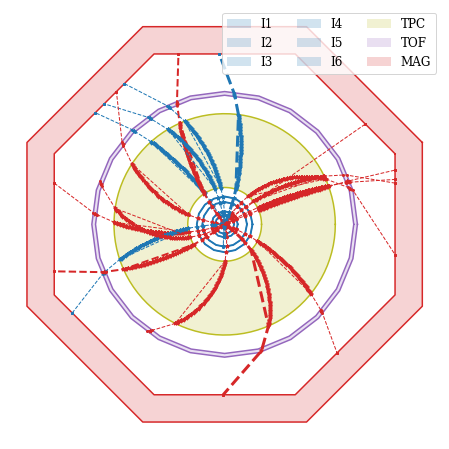

In [90]:
o = Onion()
o.run(n=20)

If the above experimental set-up looks familiar to you, then you may also guess which experiment the author is a collaborator of. 

# What about three-dimensional simulation?

Doing a simulation in three dimensions is not easy.  This toy exploits nice features of a two dimensional Euclidean space, which are not always available in higher dimensions.  The challenge in going to 3D really lies in the track propagation.  If we were to search all volume boundaries (as done here) in each step, in 3D, then the problem would quickly become insurmountable.  In real-like implementations of simulations (such as GEANT) one uses techniques such as _voxelisation_ to solve this and other issues. 

The intent of the code presented here is not to make a physically accurate simulation, but to illustrate techniques in _Object Oriented Programming_ and some of the concepts applied to simulations in high energy physics. 

In [91]:
ParticleType.__doc__ = \
"""Encode particle type information

Objects of this class encodes information about a particular particle 
type (e.g., proton, pion, Higgs).  It has the properties 

- m: Mass of the particle 
- q: Charge of the particle 
- n: Name of the particle 
- i: PDG identification number 

Parameters
----------
id : int 
    PDG identifier 
name : str
    Name of particle type (typically in LaTex)
mass : float 
    The mass of the particle 
charge : int 
    The electric charge of the particle"""

ParticleType.i.__doc__ = "PDG identifier"
ParticleType.m.__doc__ = "Particle type mass (GeV/c**2?)"
ParticleType.q.__doc__ = "Particle type electric charge"
ParticleType.name.__doc__ = "Name of particle type"

In [92]:
ParticleDB.__doc__ = \
"""Database of particle types 

This is a database of the known particle types.  It contains 
a list of particle types.  We can draw random particle types
using the method `random`.  The probability for a particular 
type is given by  

    1/m 
    
unless otherwise specified.

Particle type can also be retrieved via subscripting this object
with the PDG code.  For example 

    >>> db = ParticleDB()
    >>> proton = db[2212]

"""

ParticleDB.add.__doc__ = \
"""Registers a particle type with the database

Parameters
----------
p : ParticleType 
    The particle type to register 
prob : float (default 1/p.m)
    Probability of particle type
"""

ParticleDB.random.__doc__ = \
"""Pick _n_ random particle types 

Example
-------

    >>> db = ParticleDB()
    >>> ps = db.random(10)
    >>> for pt in ps: print(pt)
    
Parameters
----------
size : int 
    Number of particle types to retrieve 
    
Returns
-------
l : list 
    List of retrieved particle types.  Note, for `size=1` we 
    still return a list
"""

In [93]:
Particle.__doc__ = \
"""A generated particle.  

Note object of this class are immutable 

Parameters
----------
tpe : ParticleType 
    Type of particle 
origin : array (size 2)
    Point of origin 
momentum : array (size 2)
    Momentum at point of origin
    
"""

Particle.e.__doc__ = "Particle energy"
Particle.eta.__doc__ = "Particle pseudorapidity"
Particle.p.__doc__ = "Momentum vector"
Particle.pp.__doc__ = "Momentum (length of momentum vector)"
Particle.pt.__doc__ = "Transvere momentum"
Particle.pz.__doc__ = "Longtitudional momentum"
Particle.theta.__doc__ = "Polar angle"
Particle.type.__doc__ = "`ParticleType` object"
Particle.v.__doc__ = "Point of origin"
Particle.y.__doc__ = "Rapidity"

In [94]:
Generator.__doc__ = \
"""Base class for particle generators

Parameters
----------
db : ParticleDB
    Databae of particles to use
"""
Generator.generate.__doc__ = \
"""Generate _n_ random particles 

Parameters
----------
size : int 
    Number of particle to gnerate"""

In [95]:
ExpNormal.__doc__ = "Specific implementation of the Generator interface"

In [96]:
Track.__doc__ = \
"""A mutable wrapper around a Particle

Objects of this class is what we pass around when swiming through
the setup.  It references the original particle, but has otherwise 
the option of being updated independently.  

Parameters
----------
orig : Particle 
    Wrapped particle 
v : array (size 2)
    Current position
p : array (size 2)
    Current momentum (GeV/c?)
t : float 
    Current time (s)
"""
Track.t.__doc__ = "Current time (s)"
Track.o.__doc__ = "Original particle"
Track.update.__doc__ = \
"""Update particle position, momentum, and time 

Parameters
----------
v : array (size 2)
    New posistion
p : array (size 2)
    New momentum
t : float
    New time
"""

In [97]:
rayAndSegment.__doc__ = \
"""Find intersect (if any) between ray and line segment

Parameters
----------
v : array (size 2)
    Starting point of ray 
p : array (size 2)
    Direction of ray 
a : array (size 2)
    End point of line segment
b : array (size 2)
    End point of line segment
    
Returns
-------
t, i : float, array (size 2)
    Time to intersect and intersection point 
None : 
    If no intersection point was found
"""

In [98]:
plotSegment.__doc__ = \
"""Plot a line segment |AB|

    >>> plotSegment((1,1),(2,3),'--',color='r')
    
Parameters
----------
args : 
    At least end-points of line segment A,B, followed 
    by arguments to `matplotlib.pyplot.plot`
kwargs : 
    Keyword arguments for `matplotlib.pyplot.plot`
    
Returns
-------
a : list 
    Artists
"""

In [99]:
plotRay.__doc__ = \
"""Plot a line segment v+t*[]

    >>> plotRay((1,1),(2,3),'--',color='b')
    
Parameters
----------
args : 
    At least starting point and direction, followed 
    by arguments to `matplotlib.pyplot.plot`
kwargs : 
    Keyword arguments for `matplotlib.pyplot.plot`
    
Returns
-------
a : list 
    Artists
"""

In [100]:
plotIntersect.__doc__ = \
"""Plot intersection point (if any)

    >>> plotIntersect(0,1,1,'o',color='g')

Parameters
----------
t, i : float, array (size 2)
    Time to and point of intersection, or `None` 
    
Returns
--------
a : list 
    Artists
"""

In [101]:
momenta.__doc__ = \
"""Generate momentum vectors in a range of angles

This function generates `n` momentum vectors of length `p`
between two angles.  The angles can be given explictly via 
arguments `theta1` and `theta2`, as points `a`, `b`, or 
be taken as the least and largest angle of vertices in `v`. 
We can apply a scale factor to the angles by the arguments 
`sa` and `sb`, respectively. 

Parameters
----------
p : float 
    Length of momentum vectors 
n : int 
    Number of vectors made 
theta1, theta2 : floats 
    Lower and upper bound 
a, b : array (size 2)
    Lower and upper points 
v : iterable of arrays (size 2)
    Vertices 
sa,  sb : float 
    Scale factors for min and max
    
Returns
-------
p : array (size (n,2))
    Momentum vectors
"""

In [102]:
testRaySegment.__doc__ = "Test of `rayAndSegment`"

In [103]:
earliest.__doc__ = \
"""Given a number of times of and points of intersection, return the earliset

Given a number of times of and points of intersection (and possibly more) of 
the form 

    (t,*other)
    
find the argument with the least `t` and return that.  Arguments can be `None`

    >>> earliest((3,'a'),(2,'b'),None,(4,'c'))
    
Parameters
----------
args : tuples of (t,*other)
    The times and other information to find earliest of 

Returns
-------
t,*other : tuple
    The earliest argument, or empty list if not found
"""

In [104]:
testEarliest.__doc__ = 'Test of `earliest`'

In [105]:
rayAndPolygon.__doc__ = \
"""Find time of and point of intersection between ray and polygon

Find the time to intersection and intersection point of a ray 
starting at `v` traveling in the direction `p` and the polygon
given by vertices `vert`.  Thus find the earliest (if any) 
intersection point of ray with all sides of the polygon. 

Parameters
----------
v : array (size 2)
    Point of origin of ray 
p : array (size 2)
    Direction of ray 
vert : iterable of arrays (size 2)
    Polygon vertices
    
Returns
-------
t, i : float, array (size 2)
    time to and point of intersection, or None
"""

In [106]:
plotPolygon.__doc__ = \
"""Plot a polygon 

Parameters
----------
verts : array (shape (n,2))
    Array of vertices 
*args : any 
    Additional arguments to matplotlib.pyplot.plot 
**kwargs : any 
    Keyword arguments to matplotlib.pyplot.plot
"""

In [107]:
testRayPolygon.__doc__ = "Test of `rayAndPolygon`"

In [108]:
rayPointOnArc.__doc__ =\
"""Determine if a point on ray is within arc bounds 

This function checks for the point 

    i = v + t * p 
    
that t is larger than 0 and smaller than `maxt` (if positive),
and that the point `i` is on the arc from angle `a` to `b`

Parameters
----------
v : array (size 2)
    Point of origin of ray 
p : array (size 2)
    Direction of ray 
t : float 
    Time of intersect 
a, b : float (optional)
    Start and end angle of arc 
maxt : float (optional)
    Largest `t` 
    
Returns
-------
t : float
    time to intersect 
i : array (size 2)
    Point of intersect
None : 
    If the intersect isn't valid
"""

In [109]:
rayAndArc.__doc__ = \
"""Find intersection point between a ray and an arc 

Parameters
----------
v : array (size 2)
    Point of origin of ray 
p : array (size 2)
    Direction of ray 
c : array (size 2)
    Center of arc 
r : float
    Radius of arc. 
theta1, theta2 : float (optional)
    Start and end angles of arc 
maxt : float
    Limit on time of intersection of ray
Returns
-------
t : float
    time to intersect 
i : array (size 2)
    Point of intersect
None : 
    If the intersect isn't valid
"""

In [110]:
plotArc.__doc__ = \
"""Plot an arc 

Parameters
----------
c : array (size 2)
    Center of arc 
r : float
    Radius of arc. 
theta1, theta2 : float (optional)
    Start and end angles of arc 
*args : any 
    Additional arguments to matplotlib.pyplot.plot 
**kwargs : any 
    Keyword arguments to matplotlib.pyplot.plot
"""

In [111]:
testRayArc.__doc__ = "Test of `rayAndArc`"

In [112]:
arcAngle.__doc__ = \
"""Determine angle of intersection point on arc 

Parameters
----------
v : array (size 2)
    Point of origin of arc 
c : array (size 2)
    Center of arc 
i : array (size 2)
    Point of intersect 
    
Returns
----------
a : float 
    Angle between v and i
"""

In [113]:
arcAndSegment.__doc__ = \
"""Find intersect between circular path and line segment

That is, on the arc of radius `r` starting at `v` with 
direction `p` at that point, find the intersection (if any) 
with the line segment `a,b`.  If the center of the arc `c` 
is not given it is calculated as 

    c = v + r * (-p[1], p[0]) / sqrt(p[0]**2+p[1]**2)


Parameters
----------
v : array (size 2)
    Point of origin of arc 
p : array (size 2)
    Direction of arc at v 
c : array (size 2) (optional)
    Center of arc 
r : float
    Radius of arc. 
a, b : array (size 2)
    End points of segment
    
Returns 
-------
ang : float 
    Angle of intersect from v 
i : array (size 2)
    Point of intersect 
    
or 

None : 
    if no intersect was not found
"""

In [114]:
plotDirArc.__doc__ = \
"""Plot an arc of radius r starting at v in direction r

Parameters
----------
v : array (size 2)
    Point of origin of arc 
p : array (size 2)
    Direction of arc at v 
c : array (size 2) (optional)
    Center of arc 
r : float
    Radius of arc. 
*args : any 
    Additional arguments to matplotlib.pyplot.plot 
**kwargs : any 
    Keyword arguments to matplotlib.pyplot.plot
    
Returns
-------
c : array (size 2)
    Center of arc
"""

In [115]:
arcAndPolygon.__doc__ = \
"""Find time of and point of intersection between arc of radius r 
starting at `v` traveling in the direction `p` and the polygon
given by vertices `vert`.

Parameters
----------
v : array (size 2)
    Point of origin of arc 
p : array (size 2)
    Direction of arc at v
r : float 
    Radius of revolution 
vert : iterable of arrays (size 2)
    Polygon vertices
c : array (size 2) (optional)
    Center of arc 
    
Returns
-------
t, i : float, array (size 2)
    time to and point of intersection, or None
"""

In [116]:
testArcPolygon.__doc__ = "Test of `arcPolygon`"

In [117]:
arcPointOnArc.__doc__ = \
"""Check if time of and point of intersection is consistent with arcAndArc

Check if 

- time to intersect is not negative 
- if `theta1` and `theta2` are given, check that the 
  angle of `i` relative to `c` is within those bounds 
  
Parameters
----------
t : float 
    Time to intersect 
i : array (size 2)
    Point of intersect 
c : array (size 2)
    Center of arc 
theta1, theta2 : float
    Limits on arc 

Returns
-------
t : float 
    As above 
i : array (size 2)
    As above 
    
or 

None : 
    if the above conditions are not met 
"""

In [118]:
arcAndArc.__doc__ = \
"""Determine time to and point intersect between two arcs

One arc is given by point of origin `v`, the direction `p` at `v`, 
and a radius `r`.  The center of the arc can be specified as `c`
or calculated by the function.  

The second arc is given by its center `o` and radius `q` and 
possibly the starting `a` and ending `b` angles. 

Parameters
----------
v : array (size 2)
    Point of origin of first arc 
p : array (size 2)
    Direction of first arc at v
r : float 
    Radius of revolution
o : array (size 2)
    Center of second arc 
q : float 
    Radius of second arc 
theta1, theta2 : float 
    Start and end angle of arc
c : array (size 2) (optional)
    Center of first arc 
    
Returns
-------
t, i : float, array (size 2)
    time to and point of intersection, or None
"""

In [119]:
testArcArc.__doc__ = "Test of `arcAndArc`"

In [120]:
Medium.__doc__ = \
"""Base class for tracking mediums. 

A tracking medium represents a medium that we will propagate
a particle through.  This could be, for example, air, a 
magnetic or electric field (possibly combined), a gas, or
some absorber material in which we will get cascades. Here, 
we will only define `Air` and `MagneticField` 
"""
Medium.intersect.__doc__ =\
"""Main method of a medium. 

This method must be overridden in derived classes. 

The method takes a shape given either by 

- a list of `vertices` 
- or an arc of some `radius` at some `center`, possibly between
  angles `theta1` and `theta2` 
  
The method will then calculate the time to and point of intersection
with the `track` and the shaped passed. 

Parameters
----------
track : Track 
    The track to propagate through medium
vertices : iterable (n arrays of size 2, optional)
    List of vertices in a polygon shape 
center : array (size 2)
    Center of an arc 
radius : float 
    Radius of an arc 
theta1, theta2 : float 
    Start and end angles of arc 
    
Returns
-------
t : float 
    time to intersect 
i : array (size 2)
    Point of intersect 
p : array (size 2)
    momentum at point of intersect 
    

or 

None : 
    If not intersect is found 
"""

Medium.Default.__doc__ = "The default tracking medium (Air)"

In [121]:
Air.__doc__ = \
"""A tracking medium with nothing in it

This tracking medium has no properties, and particles 
traverse it in straight lines.  Thus, we use the function
`rayAndPolygon` and `rayAndArc` to find points of intersect"""
Air.intersect.__doc__ = \
"""Main method this medium. 

The method takes a shape given either by 

- a list of `vertices` 
- or an arc of some `radius` at some `center`, possibly between
  angles `theta1` and `theta2` 
  
The method will then calculate the time to and point of intersection
with the `track` and the shaped passed. 

Parameters
----------
track : Track 
    The track to propagate through medium
vertices : iterable (n arrays of size 2, optional)
    List of vertices in a polygon shape 
center : array (size 2)
    Center of an arc 
radius : float 
    Radius of an arc 
theta1, theta2 : float 
    Start and end angles of arc 

Returns
-------
t : float 
    time to intersect 
i : array (size 2)
    Point of intersect 
p : array (size 2)
    momentum at point of intersect

or 

None : 
    If not intersect is found 
"""

In [122]:
testAir.__doc__ = "Test of `Air` medium"

In [123]:
MagneticField.__doc__ = \
"""A tracking medium with a homogenious magnetic field 
pointing in or out of the plane

This tracking medium has no properties, and particles 
traverse it in straight lines.  Thus, we use the function
`arcAndPolygon` and `arcAndArc` to find points of intersect

Parameters
----------
b : float 
    Magnetic field (possibly signed)
"""

MagneticField.intersect.__doc__ = \
"""Main method this medium. 

The method takes a shape given either by 

- a list of `vertices` 
- or an arc of some `radius` at some `center`, possibly between
  angles `theta1` and `theta2` 
  
The method will then calculate the time to and point of intersection
with the `track` and the shaped passed. 

Parameters
----------
track : Track 
    The track to propagate through medium
vertices : iterable (n arrays of size 2, optional)
    List of vertices in a polygon shape 
center : array (size 2)
    Center of an arc 
radius : float 
    Radius of an arc 
theta1, theta2 : float 
    Start and end angles of arc 
    
Returns
-------
t : float 
    time to intersect 
i : array (size 2)
    Point of intersect 
p : array (size 2)
    momentum at point of intersect 
    

or 

None : 
    If not intersect is found 
"""

In [124]:
testBfld.__doc__ = "Test of `Air` medium"

In [125]:
Shape.__doc__ = \
"""Base class for shapes 

Derived classes must implement the `intersect` method

Properties
----------
v : list of iterable of arrays (size 2)
    Plotting points of shape.  This is a list
    of arrays of points used for drawing the 
    shape 
"""

Shape.intersect.__doc__ = \
"""Main method of this class 

Derived classes must implement this method 

Calculates the intersect of `track` with this shape 
when propagating through `medium`.  

Parameters
----------
track : Track 
    Track to propagate 
medium : Medium 
    Tracking medium to use when propagating 
    
Returns
-------
t : float 
    time to intersect 
i : array (size 2)
    Point of intersect 
p : array (size 2)
    momentum at point of intersect
"""

Shape.v.__doc__ = \
"""list of iterable of arrays (size 2)

Plotting points of shape.  This is a list
of arrays of points used for drawing the 
shape 
"""

In [126]:
Polygon.__doc__ = \
"""A polygon shape 

Parameters
----------
vertices : iterable of arrays (size 2)
    A list of vertices.  If the path is not closed, we 
    close it explicitly. 
"""

Polygon.intersect.__doc__ = Shape.intersect.__doc__

In [127]:
Rectangle.__doc__ = \
"""A rectangular shape 

Parameters
----------
width : float 
    Width of rectangle 
height : float 
    Heigh of rectangle 
center : array (size 2, optional)
    Center point of rectangle 
"""
Rectangle.intersect.__doc__ = Shape.intersect.__doc__

In [128]:
Arc.__doc__ = \
"""An arc shape 

Parameters
----------
radius : float 
    Radius of arc 
center : array (size 2, optional)
    Center of arc 
theta1, theta2 : float (optional)
    Start and end angles of arc
"""

Arc.intersect.__doc__ = Shape.intersect.__doc__

In [129]:
testShape.__doc__ = "Test of shapes"

In [130]:
Transform.__doc__ = \
"""Base class for coordinate transformations

This class defines the interface for transforming between local and 
global coordinate systems
"""

Transform.to_local.__doc__ = \
"""Transform global coordinates or direction to local

Parameters
----------
p : array (size 2)
    Coordinates (`shift=True`) or direction (`shift=False`) to 
    transform 
shift : bool 
    Whether `p` is coordinates (`True`) or a direction (`False`)
    
Returns
-------
pp : array (size 2)
    Coordinates or direction in local frame
"""

Transform.to_global.__doc__ = \
"""Transform local coordinates or direction to global

Parameters
----------
p : array (size 2)
    Coordinates (`shift=True`) or direction (`shift=False`) to 
    transform 
shift : bool 
    Whether `p` is coordinates (`True`) or a direction (`False`)
    
Returns
-------
pp : array (size 2)
    Coordinates or direction in global frame
"""

Transform.I.__doc__ = "Identity transform"

In [131]:
Translation.__doc__ = \
"""A pure translation by some coordinates 

Parameters 
----------
*args : any 
    Coordinates to transform by
"""
Translation.to_local.__doc__ = Transform.to_local.__doc__
Translation.to_global.__doc__ = Transform.to_global.__doc__

In [132]:
Rotation.__doc__ = \
"""A pure rotation by some angle 

Parameters 
----------
r : float 
    Rotation angle
degrees : bool 
    if true, assume r is in degrees (instead of radians)
"""
Rotation.to_local.__doc__ = Transform.to_local.__doc__
Rotation.to_global.__doc__ = Transform.to_global.__doc__

In [133]:
Combined.__doc__ = \
"""A combined translation followed by a rotation

Parameters 
----------
t : array (size 2)
    Translation cooordinates
r : float 
    Rotation angle
degrees : bool 
    if true, assume r is in degrees (instead of radians)
"""
Combined.to_local.__doc__ = Transform.to_local.__doc__
Combined.to_global.__doc__ = Transform.to_global.__doc__

In [134]:
testTransform.__doc__ = "Test of transformations"

In [135]:
Volume.__doc__ = \
"""A volume (or component) in the experiment set-up 

A volume represents a physical object in the experiment.  
It also represents detectors in the experiment, magnets, or 
other such components that.   When a particle is found to 
imping on a volume, the control is handed off to the 
volumes `interact` method.  That method is then expected 
to return a new track with the new position, momentum, and 
time, as well as any measurements done by the volume. 

A derived class can override `interact` to define custom 
propagation and measurements by a given volume. 

Properties 
----------
n : str
    Volume name 
s : Shape 
    Volume shape 
m : Medium 
    Volume tracking media 
t : Transform
    Volume transform
    
Parameters
----------
name : str 
    Volume name
shape : Shape 
    Volume shape (can be shared)
medium : Medium 
    Volume tracking media (can be shared)
transform : Transform 
    Volume transformation 
"""

Volume.n.__doc__ = "Volume name (str)"
Volume.s.__doc__ = "Volume shape (Shape)"
Volume.m.__doc__ = "Volume tracking medium (Medium)"
Volume.t.__doc__ = "Volume transform (Transform)"

Volume.enter.__doc__ = \
"""Find interaction point with this volume. 

Given a track (position and momentum) and a medium 
outside of volume, find the point of intersection 
with this volume.  

Parameters
----------
track : Track 
    Current particle position and momentum 
    in local frame of this volume 
medium : Medium 
    Tracking medium outside of volume 

Returns
-------
t : float 
    time to intersect 
i : array (size 2)
    Point of intersect in local frame of 
    this volume 
p : array (size 2)
    momentum at point of intersect
    
or 

None : 
    If no interaction point is found 
"""

Volume.exit.__doc__ = \
"""Find interaction point with this volume. 

Given a track (position and momentum) in this volume, 
find the point of intersection (exit point) with this volume.  

Parameters
----------
track : Track 
    Current particle position and momentum 
    in local frame of this volume 
medium : Medium 
    Tracking medium outside of volume 

Returns
-------
t : float 
    time to intersect 
i : array (size 2)
    Point of intersect in local frame of 
    this volume 
p : array (size 2)
    momentum at point of intersect
    
or 

None : 
    If no interaction point is found 
"""

Volume.interact.__doc__ = \
"""Interact with track

The method is called when a this volume interacts 
with a given track.   It is expected to return 
the time and point of exit and possibly new 
momentum at exit.   If the returned momentum is 
zero, then the particle is considered dead (stopped)
and no further tracking is done.  

Derived classes can override this method to return 
additional measurements performed by a volume 

Parameters
----------
track : Track 
    The track to propagate with coordinates 
    and momentum in the local volume frame 
    
Returns
-------
track : Track 
    New track with coordinates and momentum in 
    the local volume frame 
"""

Volume.to_global.__doc__ = \
"""Transform track to from local to global frame

Transforms the volume local coordinates and momentum 
to the global frame 

Parameters
----------
track : Track 
    Track to transform 
    
Returns
-------
track : Track 
    Track transformed to global frame
"""

Volume.to_local.__doc__ = \
"""Transform track to from global to local frame

Transforms the global coordinates and momentum to 
the volume local frame 

Parameters
----------
track : Track 
    Track to transform 
    
Returns
-------
track : Track 
    Track transformed to volume local frame
"""

In [136]:
Absorber.__doc__ = \
"""A volume which absorbs particles 

Any particle impinging on this volume will be stopped. 

Thus, we do not define a tracking medium of this volume 

Parameters
----------
name : str 
    Volume name
shape : Shape 
    Volume shape (can be shared)
transform : Transform 
    Volume transformation 
"""

Absorber.interact.__doc__ = \
"""Interact with track

Stop all particles

Parameters
----------
track : Track 
    The track to propagate with coordinates 
    and momentum in the local volume frame 
    
Returns
-------
track : Track 
    New track with coordinates and momentum in 
    the local volume frame.  Note, momentum set 
    to 0. 
"""

In [137]:
testVolumeDraw.__doc__ = "Test of drawing a volume"
testVolumeTransform.__doc__ = "Test Volume.to_local and Volume.to_global transformations"
testVolumeInteract.__doc__ = "Test of Volume.interact"
testVolumeInteract2.__doc__ = "Test of Volume.interact"

In [138]:
Measurement.__doc__ = \
"""A basic measurement.  

Properties
----------
v : array (size 2)
    Position 
t : float 
    Time 
    
Parameters
----------
pos : array (size 2)
    Position 
t : float 
    Time 
"""

Measurement.x.__doc__ = "X-coordinate of measurement"
Measurement.y.__doc__ = "Y-coordinate of measurement"

In [139]:
History.__doc__ = \
"""History of track propagation and measurements 

Properties 
----------
coordinates : array (size (n,2))
    Coordinates of history 
times : array (size n)
    Times of the history 
momenta : array (size (n,2))
    Momenta in the history 
measurements : array 
    List of measurements 
    
Parameters 
----------
vol : str 
    Starting volume 
track : Track 
    Track to make history for 
    
"""

History.enter.__doc__ = \
"""Add a history entry when entering a volume 

Parameters
----------
vol : str  
    name of volume to be entered 
track : Track 
    Track entering volume 
"""

History.exit.__doc__ = \
"""Add a history entry when exiting a volume 

Parameters
----------
vol : str  
    name of volume to be entered 
track : Track 
    Track exiting volume 
"""

History.dead.__doc__ = \
"""Add a history entry when a particle dies 

Parameters
----------
vol : str  
    name of volume where particle dies
track : Track 
    Track exiting volume 
"""

History.end.__doc__ = \
"""Add a history entry when a particle reaches end 

Parameters
----------
vol : str  
    name of volume where particle ends
track : Track 
    Track exiting volume 
"""

In [140]:
Steer.__doc__ = \
"""Main steering class of the simulation package 

Objects of this class steers the actual simulation by swimming particles 
through the experimental setup.  The method `swim` accepts a particle and
swims it through the experiment, building a history of interactions and 
measurements along the way.  This history is returned to the caller, and 
is the main outcome of the simulation

Properties
----------
volumes : list 
    The list of volumes in the setup 
mother : Volume 
    The bounds of the setup and tracking medium outside of the 
    volumes 

Parameters
----------
mother : Volume 
    Mother volume defining the overall tracking medium and outer bounds 
volumes : list 
    A list of volumes to add to the simulation
"""

Steer.swim.__doc__ = \
"""Swims a particle through the experiment and records history 

Parameters
----------
p : Particle
    The particle to swim through the set-up 
maxt : float 
    The maximum time the particle is allowed to swim
maxstep : int 
    The maximum number of steps to allow 
    
Returns
-------
h : History 
    The recorded history of interactions and measurements 
"""

In [141]:
plotVolume.__doc__ = \
"""Plot a volume

Parameters
----------
v : Volume 
    Volume to plot
*args : any 
    Arguments to plot 
**kwargs : any 
    Keyword arguments to plot

Returns
-------
l : list 
    Return value of plot 
"""

In [142]:
plotSteer.__doc__ = \
"""Plot all volumes in a steer object 

Parameters
----------
s : Steer 
    Steer object to plot
*args : any 
    Arguments to plot 
**kwargs : any 
    Keyword arguments to plot

Returns
-------
l : list 
    Return value of plot 
"""

In [143]:
plotHistory.__doc__ = \
"""Plot a single history 


Parameters
----------
h: History 
    History object to plot
*args : any 
    Arguments to plot 
**kwargs : any 
    Keyword arguments to plot

Returns
-------
l : list 
    Return value of plot 
"""

In [144]:
plotMeasurements.__doc__ = \
"""Plot measurements from a %history


Parameters
----------
h: History 
    History object to plot
*args : any 
    Arguments to plot 
**kwargs : any 
    Keyword arguments to plot

Returns
-------
l : list 
    Return value of plot 
"""

In [145]:
Ring.__doc__ = \
"""An ring shape.  That is, two concentric circles 

Parameters
----------
radius : float 
    Inner radius of arc 
thickness : float 
    Thickness 
center : array (size 2, optional)
    Center of arc 
"""

Ring.intersect.__doc__ = Shape.intersect.__doc__

In [146]:
plotRing.__doc__ = \
"""Plot a ring-like shape 

That is, a shape defined by an inner and outer path 

Parameters
----------
r : Ring 
    Ring-like shape to plot
*args : any 
    Arguments to plot 
**kwargs : any 
    Keyword arguments to plot

Returns
-------
l : list 
    Return value of plot 
"""

In [147]:
PolyRing.__doc__ = \
"""An ring shape.  That is, two concentric circles 

Parameters
----------
radius : float 
    Inner radius of arc 
thickness : float 
    Thickness 
center : array (size 2, optional)
    Center of arc 
"""

PolyRing.intersect.__doc__ = Shape.intersect.__doc__

In [148]:
Test1.__doc__ = "Example of a setup using `Volume` objects"
Test1.shoot.__doc__ = "Swim a single particle through setup"

In [149]:
Test2.__doc__ = "Example of setup with visualisation"
Test2.show.__doc__ = "Plot the setup"
Test2.shoot.__doc__ = \
"""Shoot a single particle into setup

Parameters
----------
a : float 
    Angle of particle 
"""
Test2.run.__doc__ = \
"""Run _n_ particles through setup 

Parameters
----------
n : int 
    Number of particles to shoot
"""

In [150]:
Test3.__doc__ = "Example of setup with rotated `Tracker` and `TOF`"
Test3.show.__doc__ = Test2.show.__doc__ 
Test3.shoot.__doc__ = Test2.shoot.__doc__ 
Test3.run.__doc__ = """Swim 5 particles through setup"""

In [151]:
Test4.__doc__ = "Example of setup with `Magnet` volume"
Test4.setup.__doc__ = "Set-up the experiment from internal list"
Test4.shoot.__doc__ = Test2.shoot.__doc__
Test4.run.__doc__ = Test3.run.__doc__

In [152]:
Test5.__doc__ = "Example of setup with `Absorber` volumes"

In [153]:
BRAHMS.__doc__ = \
"""An (almost) complete example of an experimet 

Parameters
----------
fs : float 
    Forward spectrometer angle (0 < fs < 30) degrees 
mrs : float 
    Mid-rapidity spectrometer angle (30 < mrs < 90) degrees
"""
BRAHMS.fs.__doc__ = \
"""Set-up forward spectrometer

Parameters:
-----------
l : list
    List to add volumes to 
angle : float 
    Angle (in degrees)
air : Medium 
    Air medium
"""
BRAHMS.mrs.__doc__ = BRAHMS.fs.__doc__.replace('forward','mid-rapidity')
BRAHMS.show.__doc__ = "Draw setup"
BRAHMS.shoot.__doc__ = \
"""Shoot a single particle 

Parameters
----------
ang : float 
    Angle (degrees)
mom : float 
    Momentum
"""

BRAHMS.run.__doc__ = \
"""Run _n_ particles through each spectrometer

Parameters
----------
n : int 
    Number of particles to shoot at each spectrometer
a1 : float 
    First angle (degrees) to shoot around 
a2 : float 
    Second angle (degrees) to shoot around 
"""

In [154]:
FT.__doc__ = \
"""Shape of flight-time detector

Parameters
----------
bfl : Medium
    Magnetic field
n : int 
    Number of vertices 
radius : float 
    Inner radius 
thickness : float 
    Thickness at vertices 
efficiency : float 
    Detection efficiency
"""
FT.interact.__doc__ = Volume.interact.__doc__

In [155]:
Inner.__doc__ = FT.__doc__.replace('flight-time', 'inner tracker')
Inner.interact.__doc__ = FT.interact.__doc__

In [156]:
TPC.__doc__ = \
"""Construct TPC volume

Parameters
----------
bfl : Medium
    Magnetic field
inner : float 
    Inner radius 
outer : float 
    Outer radius
efficiency : float 
    Detection efficiency
"""
TPC.interact.__doc__ = \
"""Interact with track

This method generates measurements of charged-particle 
curved trajectories. 

Parameters
----------
track : Track 
    The track to propagate with coordinates 
    and momentum in the local volume frame 
    
Returns
-------
track : Track 
    New track with coordinates and momentum in 
    the local volume frame 
"""

In [157]:
Solenoid.__doc__ = \
"""construct octagon solenoid magnet

Parameters
----------
name : str 
    Name 
radius : float 
    Inner radius 
thickness : float 
    Thickness of magnet at vertices
"""